<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generate-graphs" data-toc-modified-id="Generate-graphs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate graphs</a></span></li><li><span><a href="#EGo-utilities" data-toc-modified-id="EGo-utilities-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EGo utilities</a></span></li><li><span><a href="#Decomposition-examples" data-toc-modified-id="Decomposition-examples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Decomposition examples</a></span></li></ul></div>

# EGo decompositions

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import networkx as nx
import toolz as tz
from eden.util import configure_logging
import logging
logger = logging.getLogger()
configure_logging(logger, verbosity=1)
import matplotlib.pyplot as plt
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

## Generate graphs

In [2]:
def make_eden_compliant(g, alphabet_size=3):
    nx.set_edge_attributes(g, '1', 'label')
    n = g.number_of_nodes()
    labels = list(np.random.randint(0,alphabet_size,n).astype(str))
    for label, u in zip(labels,g.nodes()):
        g.nodes[u]['label']=label
    return g

def build_graphs(m, alphabet_size=5):
    instance_size=m*2

    domain_graphs = [] 
    domain_graphs_targets = []
    targets_legend = []

    domain_graphs.append(nx.path_graph(instance_size))
    domain_graphs_targets.append(0)
    targets_legend.append('path')
    
    domain_graphs.append(nx.ladder_graph(int(instance_size/2)))
    domain_graphs_targets.append(1)
    targets_legend.append('ladder')
    
    domain_graphs.append(nx.cycle_graph(instance_size))
    domain_graphs_targets.append(2)
    targets_legend.append('cycle')

    domain_graphs.append(nx.circular_ladder_graph(int(instance_size/2)))
    domain_graphs_targets.append(3)
    targets_legend.append('circular_ladder')
    
    domain_graphs.append(nx.star_graph(instance_size))
    domain_graphs_targets.append(4)
    targets_legend.append('star')

    domain_graphs.append(nx.wheel_graph(instance_size))
    domain_graphs_targets.append(5)
    targets_legend.append('wheel')


    domain_graphs.append(nx.balanced_tree(2, int(np.log2(instance_size))))
    domain_graphs_targets.append(6)
    targets_legend.append('balanced_tree')


    domain_graphs.append(nx.triangular_lattice_graph(m, m))
    domain_graphs_targets.append(7)
    targets_legend.append('triangular_lattice')


    domain_graphs.append(nx.grid_2d_graph(m,m))
    domain_graphs_targets.append(8)
    targets_legend.append('grid_2d')

    domain_graphs.append(nx.hexagonal_lattice_graph(int(m/2),int(m/2)))
    domain_graphs_targets.append(9)
    targets_legend.append('hexagonal_lattice')

    domain_graphs.append(nx.complete_graph(instance_size))
    domain_graphs_targets.append(10)
    targets_legend.append('complete')

    _make_eden_compliant_ = tz.curry(make_eden_compliant)(alphabet_size=alphabet_size)
    domain_graphs = list(map(_make_eden_compliant_, domain_graphs))
    return domain_graphs, domain_graphs_targets, targets_legend

In [3]:
from utils_artificial import draw_graphs, draw_history, draw_decomposition_graphs

/Users/fabriziocosta/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


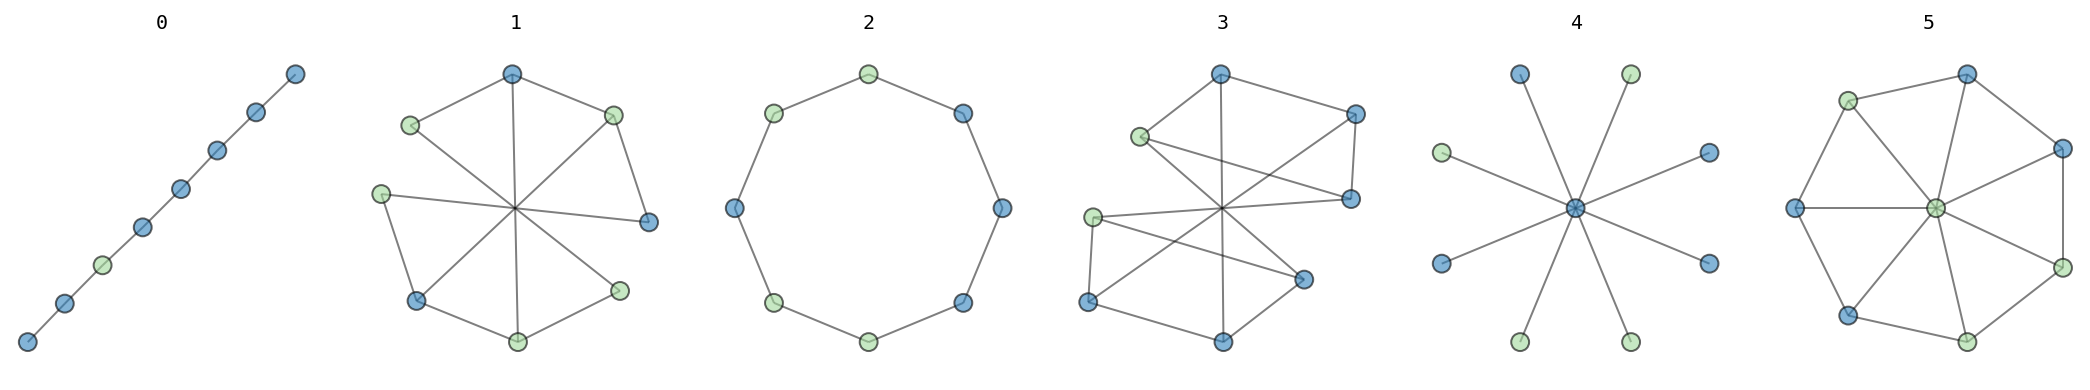

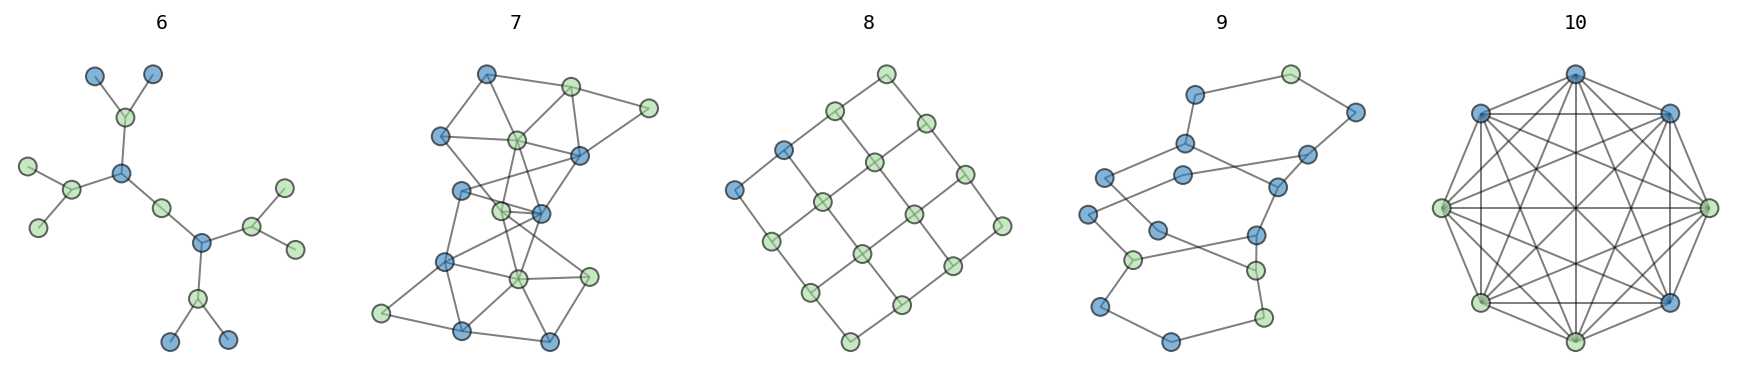

In [4]:
all_graphs, targets, labels = build_graphs(4, alphabet_size=2)
draw_graphs(all_graphs)

In [5]:
graphs = [all_graphs[9], all_graphs[6]]

## EGo utilities

In [7]:
from ego.setup import *

________________________________________________________________________________


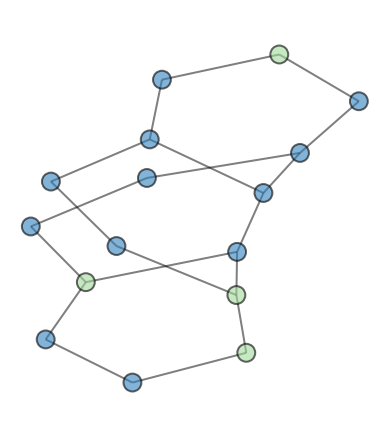

(0, 1):0 [(0, 0)]--(0, 0):1 [(0, 1)]
pair_binary+1+True(nodes(.)),2:(nodes(.))
(1, 0):0 [(0, 0)]--(0, 0):1 [(1, 0)]
pair_binary+1+True(nodes(.)),2:(nodes(.))
(0, 1):0 [(0, 0)]--(0, 0):1 [(0, 1)]
pair_binary+1+True(nodes(.)),2:(nodes(.))
(0, 1):0 [(0, 2)]--(0, 2):0 [(0, 1)]
pair_binary+1+True(nodes(.)),2:(nodes(.))
(0, 1):0 [(0, 2)]--(0, 2):0 [(0, 1)]
pair_binary+1+True(nodes(.)),2:(nodes(.))
(0, 2):0 [(0, 3)]--(0, 3):0 [(0, 2)]
pair_binary+1+True(nodes(.)),2:(nodes(.))
(0, 2):0 [(1, 2)]--(1, 2):0 [(0, 2)]
pair_binary+1+True(nodes(.)),2:(nodes(.))
(0, 2):0 [(0, 3)]--(0, 3):0 [(0, 2)]
pair_binary+1+True(nodes(.)),2:(nodes(.))
(0, 3):0 [(0, 4)]--(0, 4):0 [(0, 3)]
pair_binary+1+True(nodes(.)),2:(nodes(.))
(0, 3):0 [(0, 4)]--(0, 4):0 [(0, 3)]
pair_binary+1+True(nodes(.)),2:(nodes(.))
(0, 4):0 [(1, 4)]--(1, 4):1 [(0, 4)]
pair_binary+1+True(nodes(.)),2:(nodes(.))
(1, 0):0 [(0, 0)]--(0, 0):1 [(1, 0)]
pair_binary+1+True(nodes(.)),2:(nodes(.))
(1, 0):0 [(1, 1)]--(1, 1):0 [(1, 0)]
pair_binary+1+T

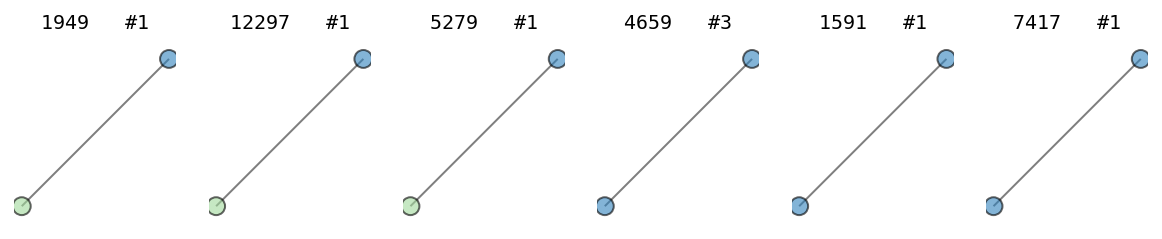

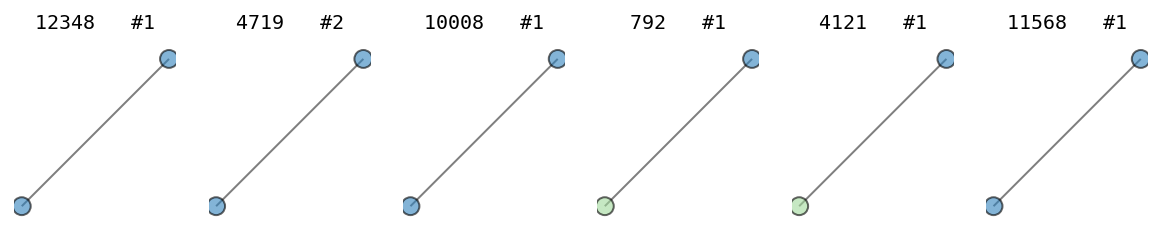

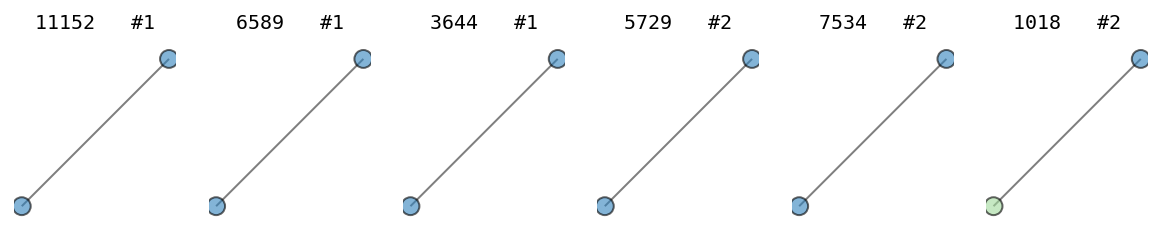

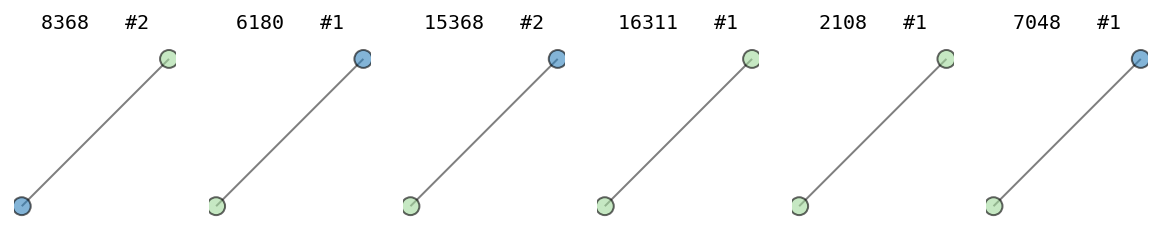

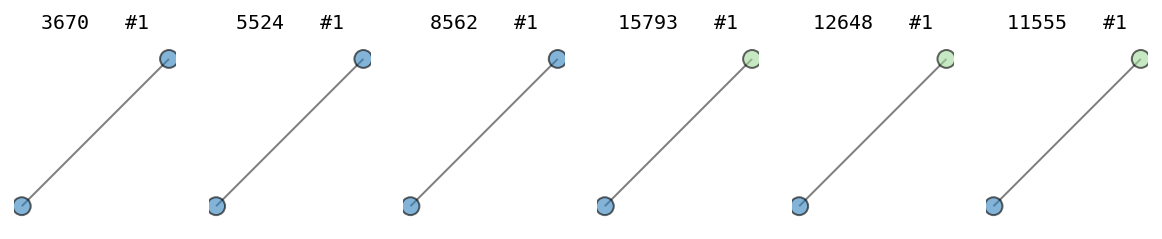

________________________________________________________________________________


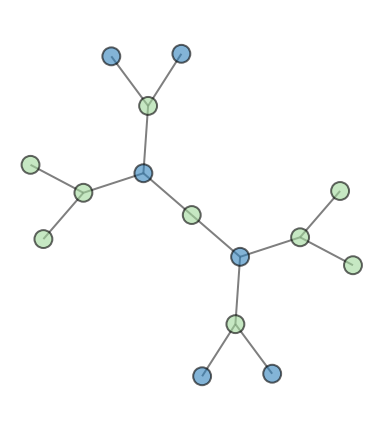

0:1 [1]--1:0 [0]
pair_binary+1+True(nodes(.)),2:(nodes(.))
0:1 [2]--2:0 [0]
pair_binary+1+True(nodes(.)),2:(nodes(.))
0:1 [1]--1:0 [0]
pair_binary+1+True(nodes(.)),2:(nodes(.))
1:0 [3]--3:1 [1]
pair_binary+1+True(nodes(.)),2:(nodes(.))
1:0 [4]--4:1 [1]
pair_binary+1+True(nodes(.)),2:(nodes(.))
0:1 [2]--2:0 [0]
pair_binary+1+True(nodes(.)),2:(nodes(.))
2:0 [5]--5:1 [2]
pair_binary+1+True(nodes(.)),2:(nodes(.))
2:0 [6]--6:1 [2]
pair_binary+1+True(nodes(.)),2:(nodes(.))
1:0 [3]--3:1 [1]
pair_binary+1+True(nodes(.)),2:(nodes(.))
3:1 [7]--7:0 [3]
pair_binary+1+True(nodes(.)),2:(nodes(.))
8:0 [3]--3:1 [8]
pair_binary+1+True(nodes(.)),2:(nodes(.))
1:0 [4]--4:1 [1]
pair_binary+1+True(nodes(.)),2:(nodes(.))
9:1 [4]--4:1 [9]
pair_binary+1+True(nodes(.)),2:(nodes(.))
10:1 [4]--4:1 [10]
pair_binary+1+True(nodes(.)),2:(nodes(.))
2:0 [5]--5:1 [2]
pair_binary+1+True(nodes(.)),2:(nodes(.))
11:0 [5]--5:1 [11]
pair_binary+1+True(nodes(.)),2:(nodes(.))
12:0 [5]--5:1 [12]
pair_binary+1+True(nodes(.)),2:(n

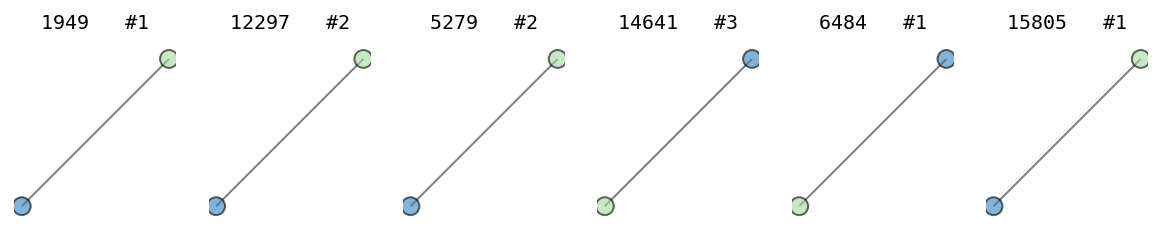

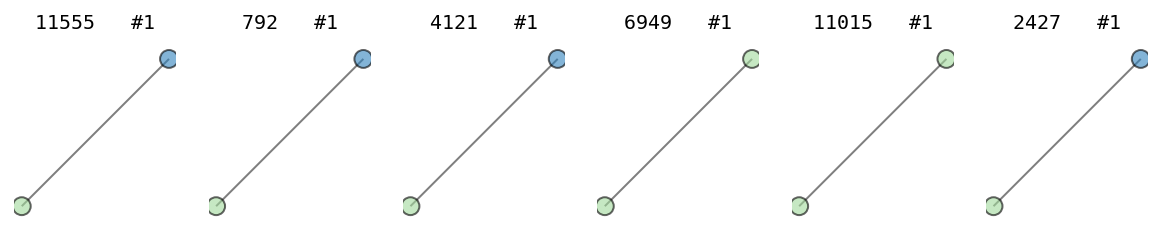

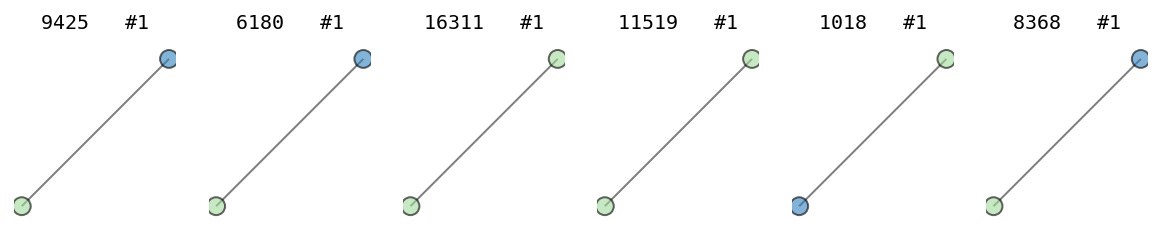

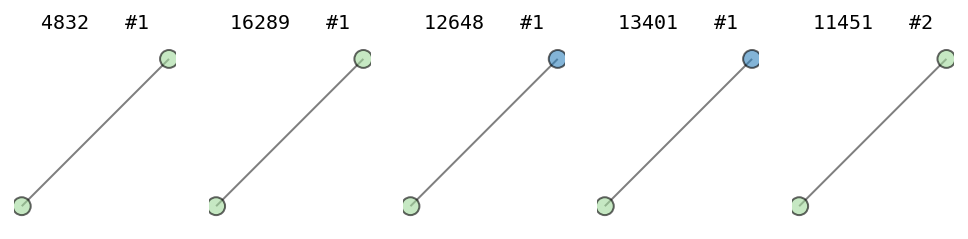

In [8]:
df = do_decompose(decompose_nodes, decompose_nodes, aggregate_function=decompose_pair_binary(distance=1))
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

## Decomposition examples

________________________________________________________________________________


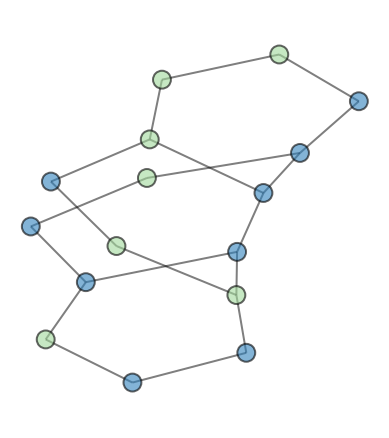

9 unique components in 45 fragments


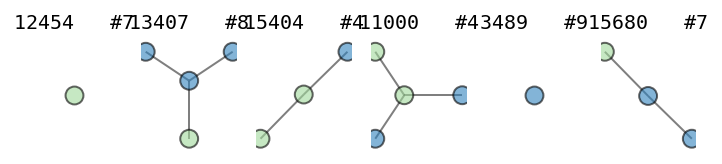

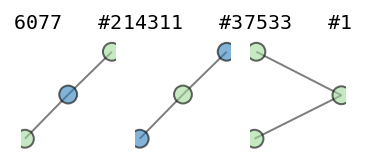

________________________________________________________________________________


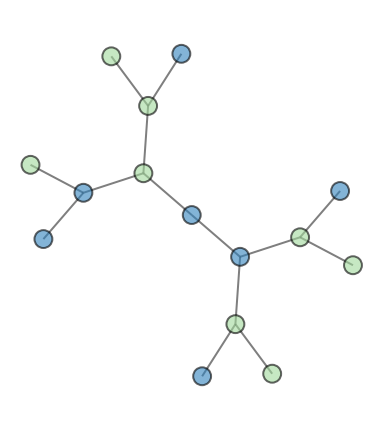

9 unique components in 30 fragments


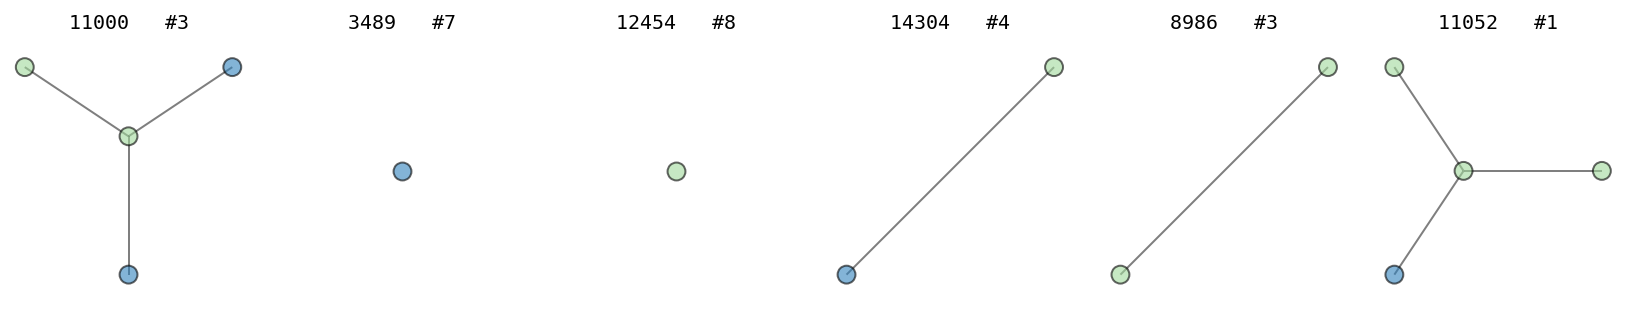

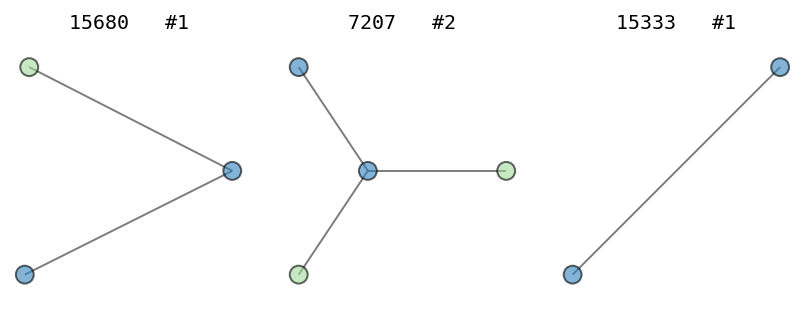

In [7]:
df = do_decompose(decompose_neighborhood(max_radius=1))
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


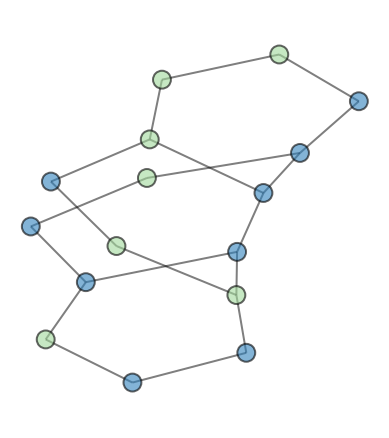

18 unique components in 59 fragments


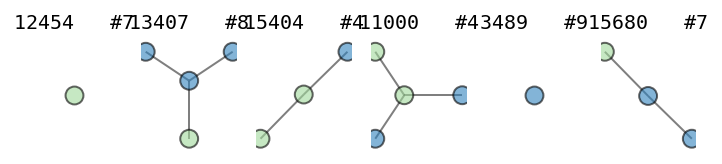

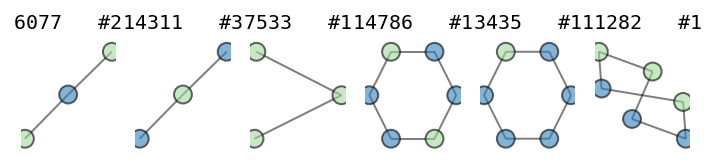

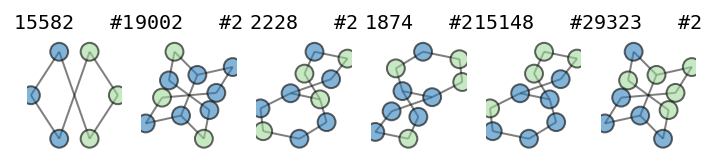

________________________________________________________________________________


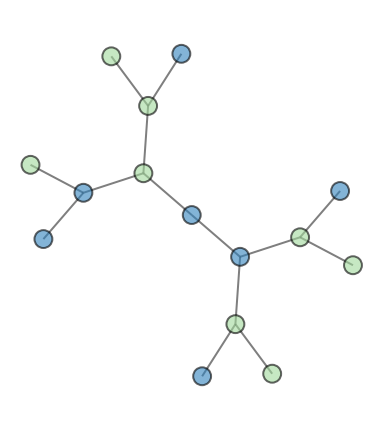

9 unique components in 30 fragments


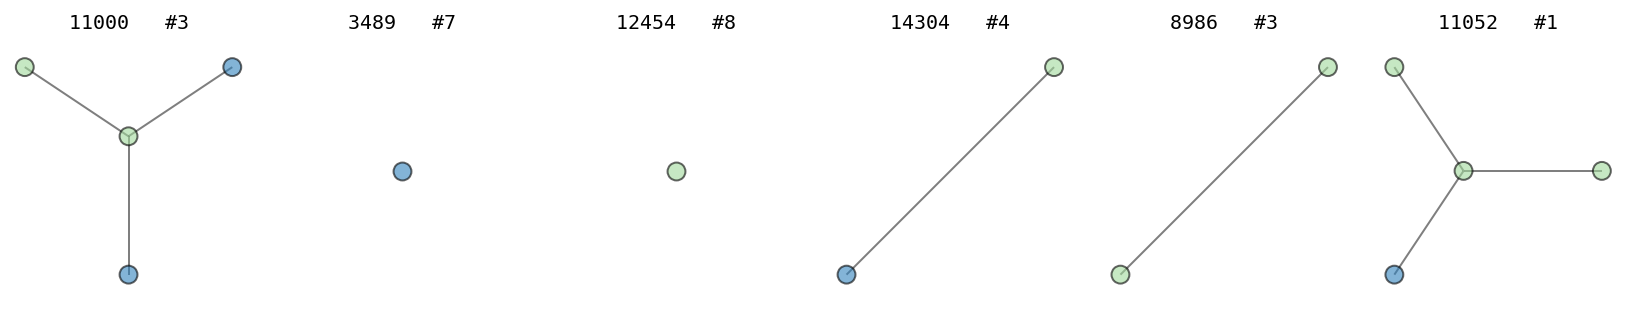

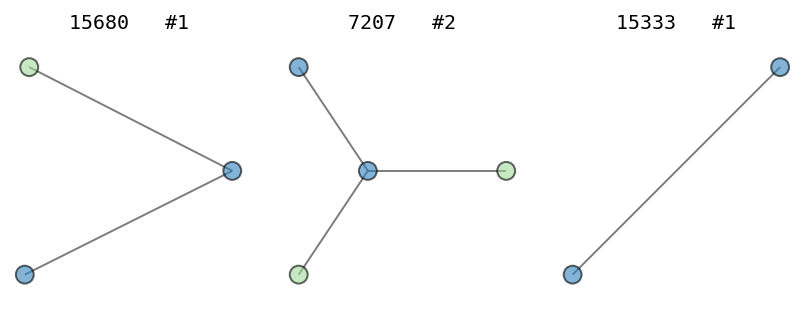

In [8]:
df = do_decompose(
    decompose_neighborhood, 
    decompose_cycles,
    do_decompose(decompose_cycles, decompose_cycles, aggregate_function=decompose_union))
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


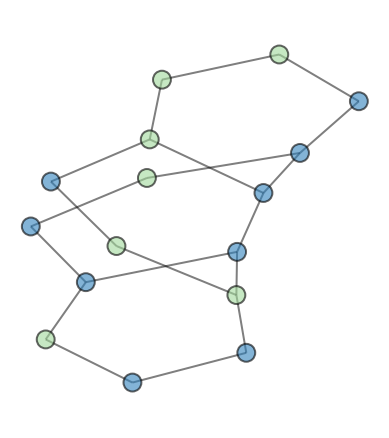

4 unique components in 4 fragments


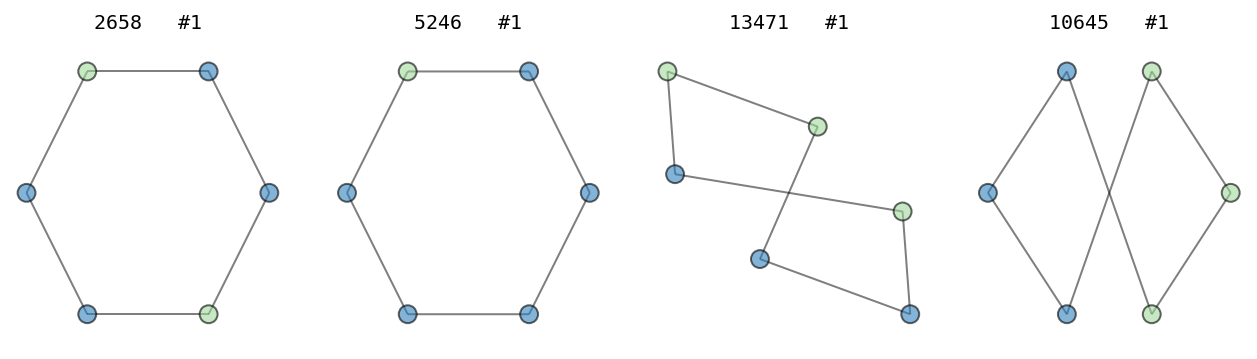

________________________________________________________________________________


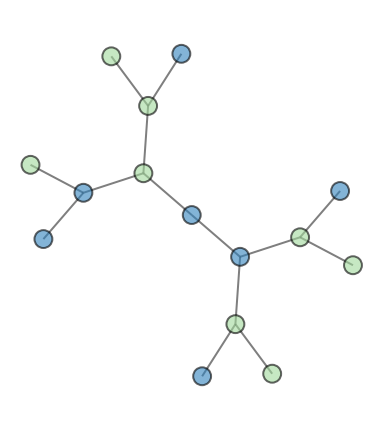

1 unique components in 1 fragments


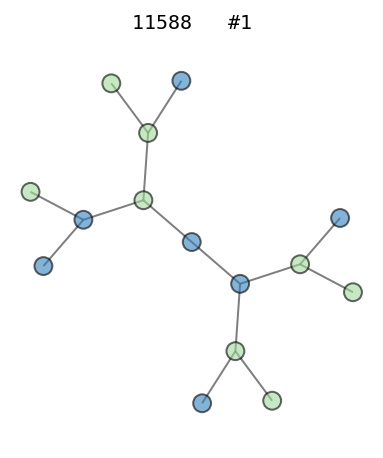

In [9]:
df = decompose_cycles_and_non_cycles
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


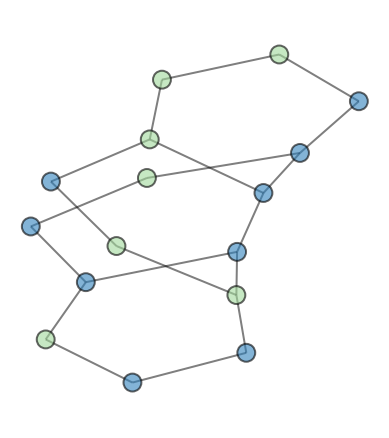

13 unique components in 49 fragments


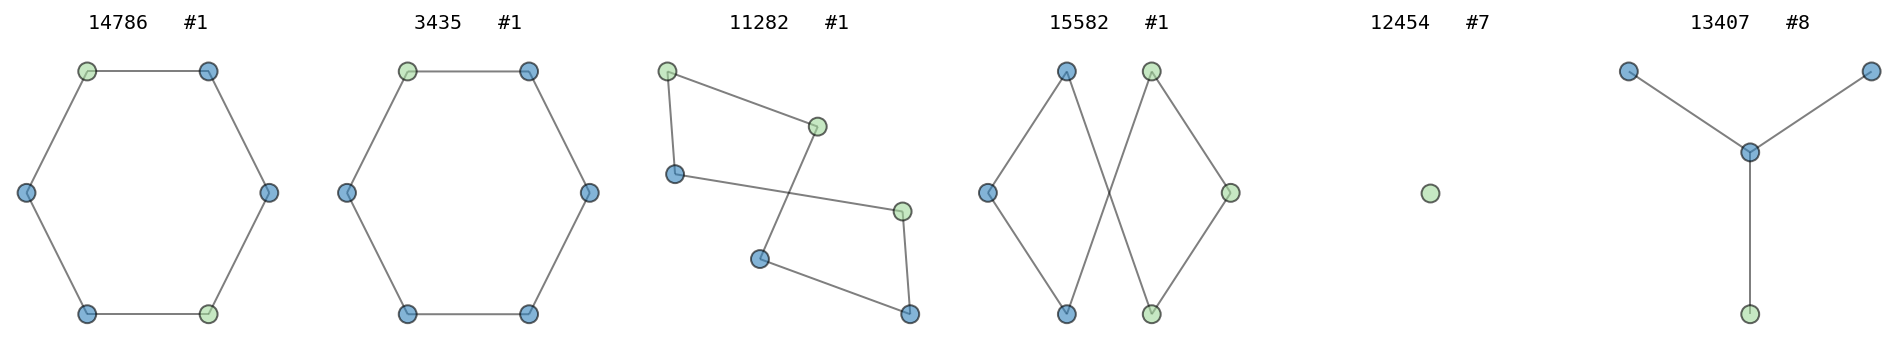

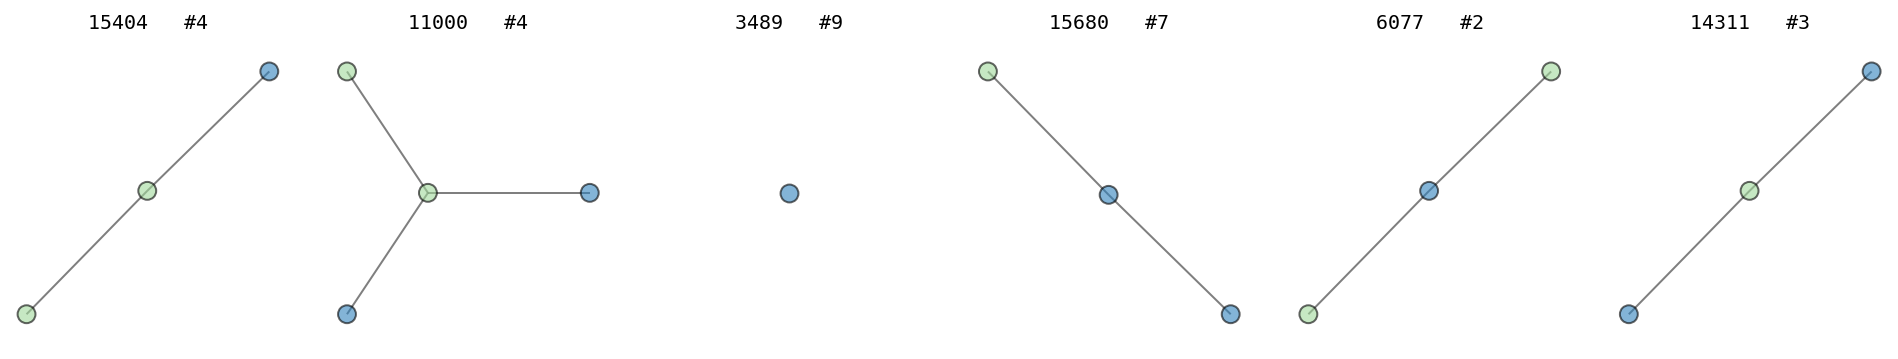

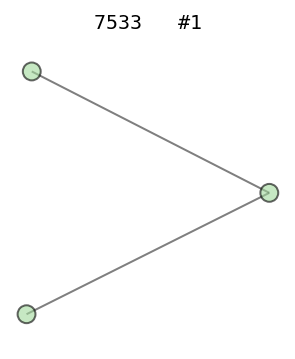

________________________________________________________________________________


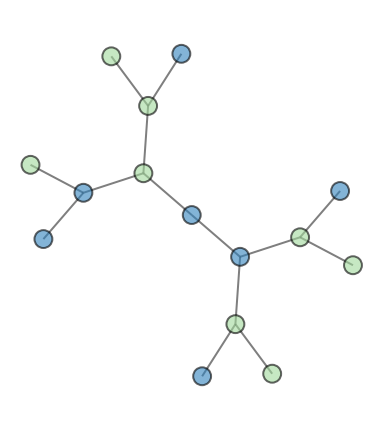

9 unique components in 30 fragments


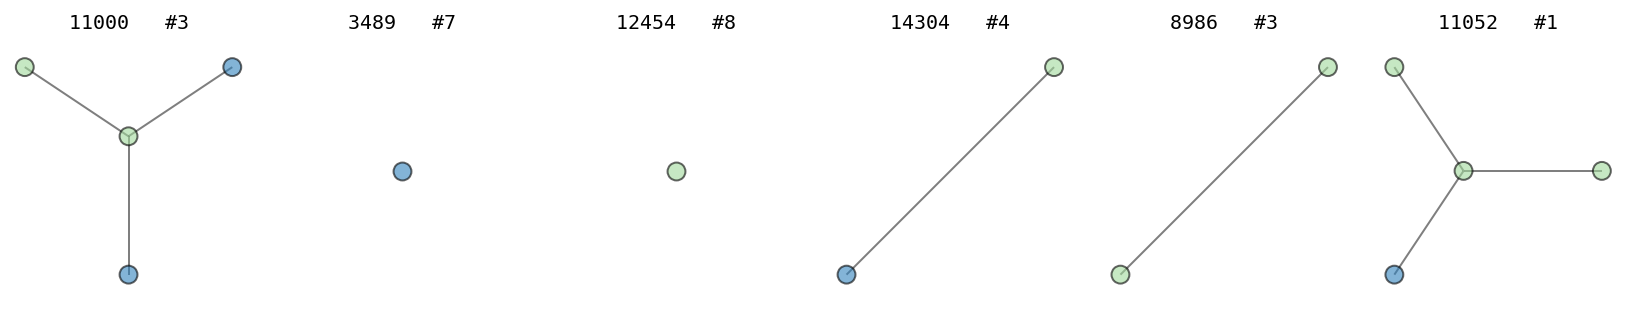

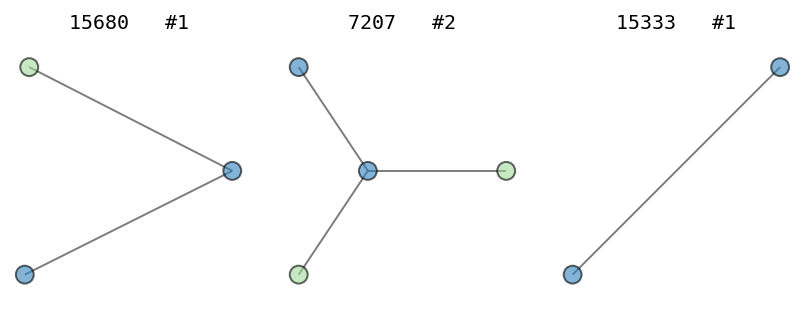

In [10]:
df = do_decompose(decompose_cycles, decompose_neighborhood, aggregate_function=decompose_concatenate, compose_function=decompose_identity)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


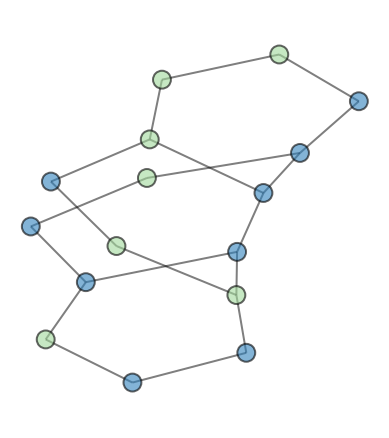

18 unique components in 69 fragments


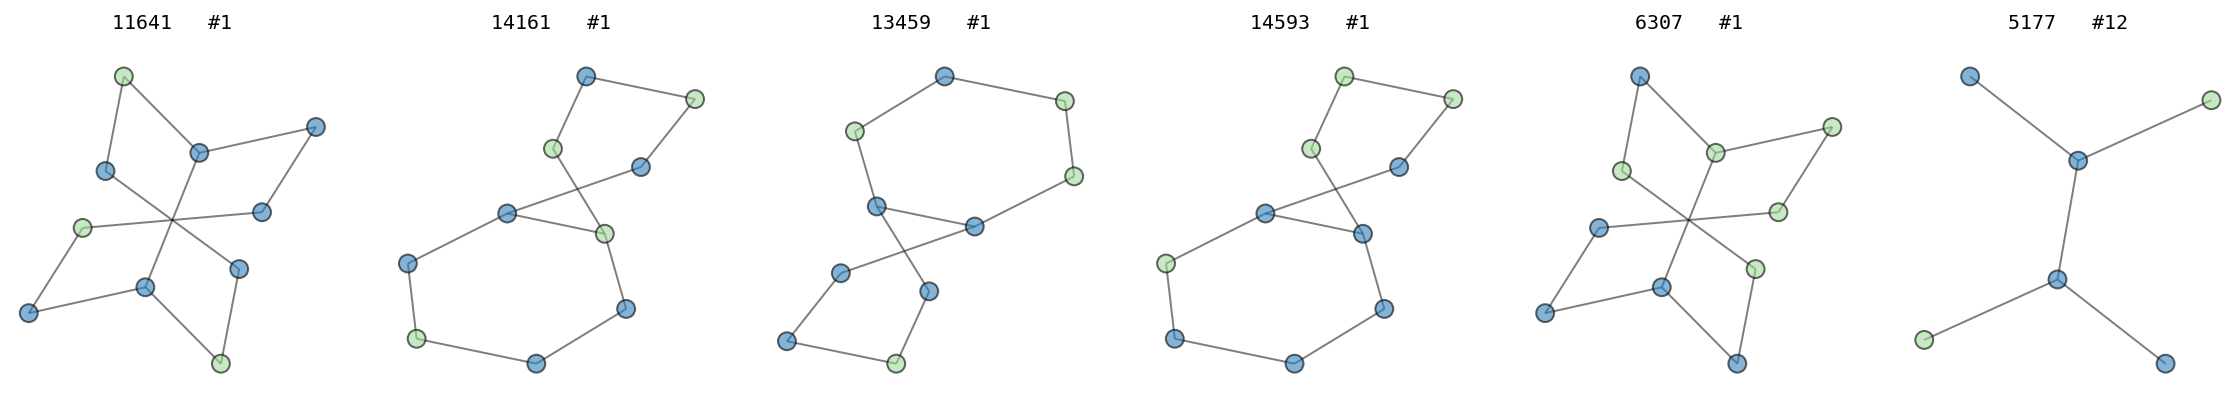

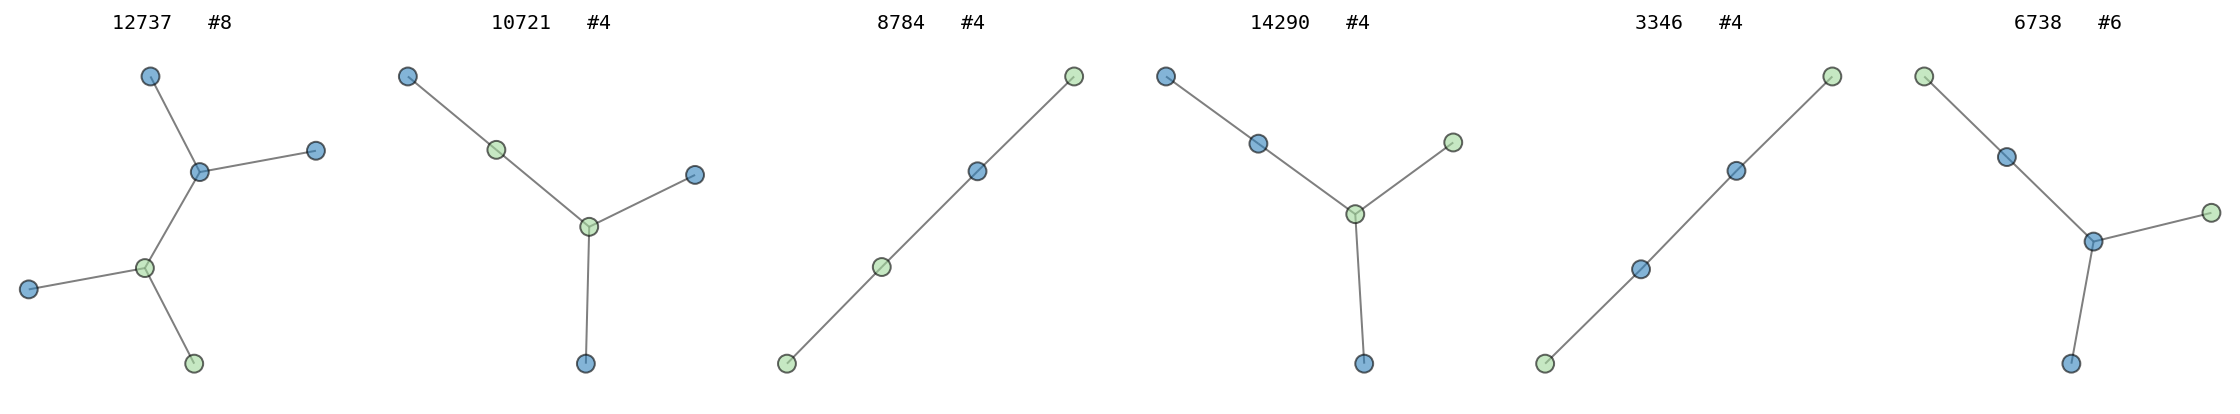

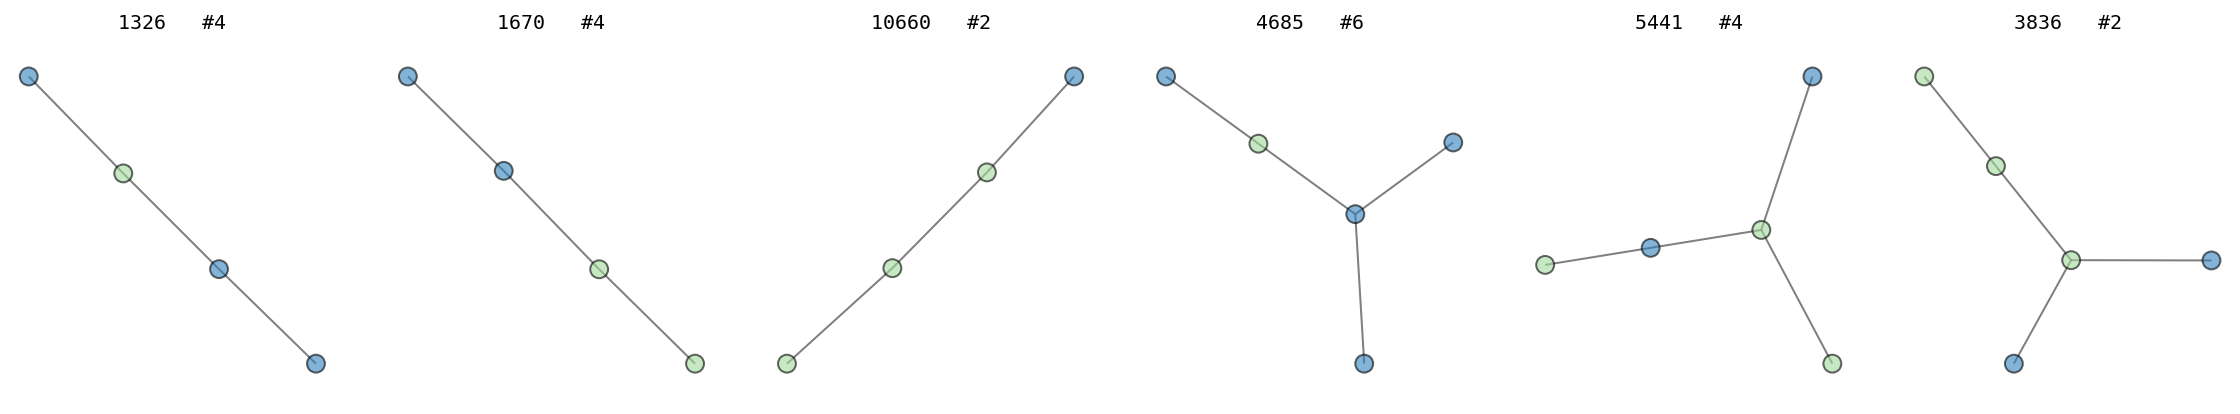

________________________________________________________________________________


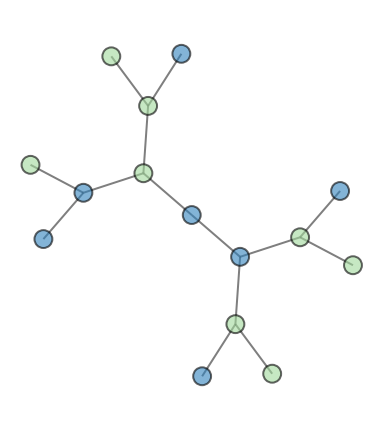

7 unique components in 14 fragments


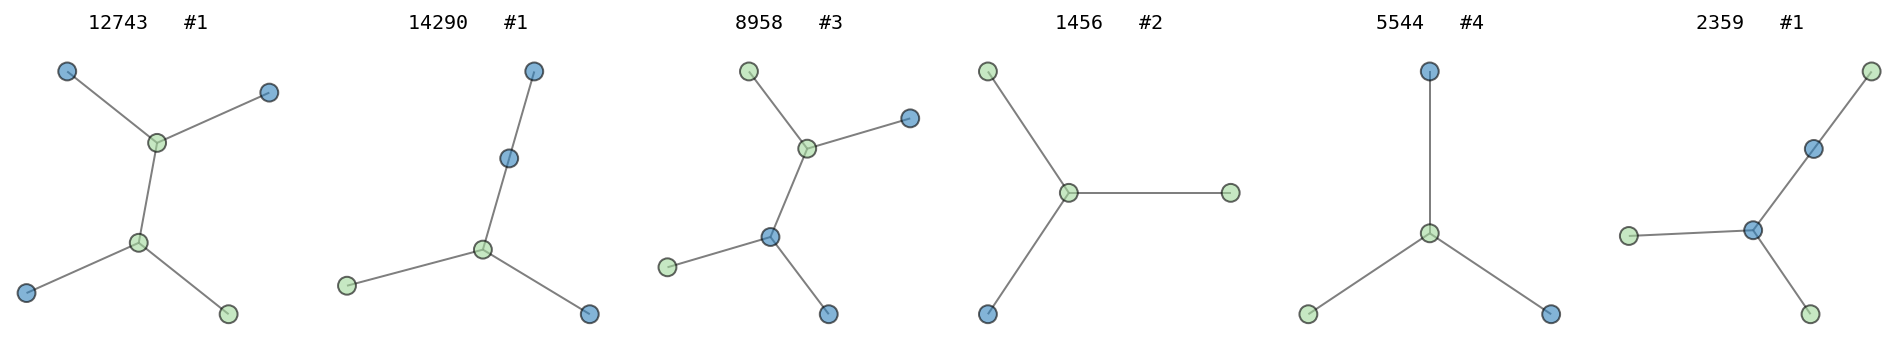

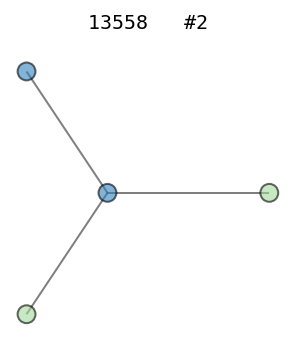

In [11]:
df = do_decompose(decompose_cycles, decompose_neighborhood, aggregate_function=decompose_concatenate, compose_function=decompose_edge_join)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


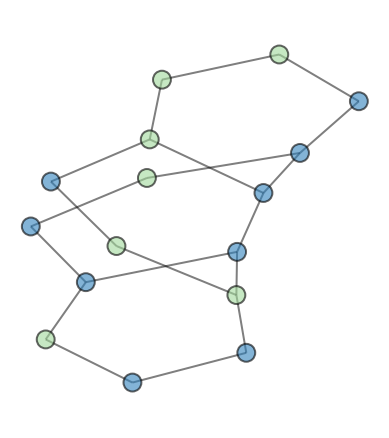

24 unique components in 26 fragments


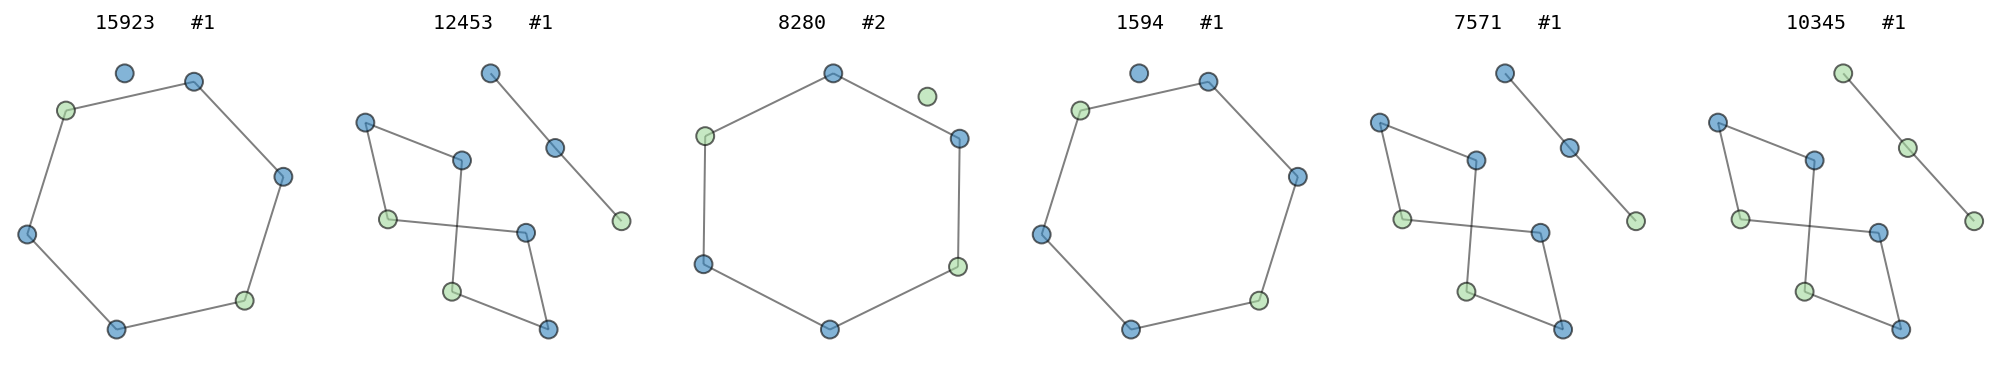

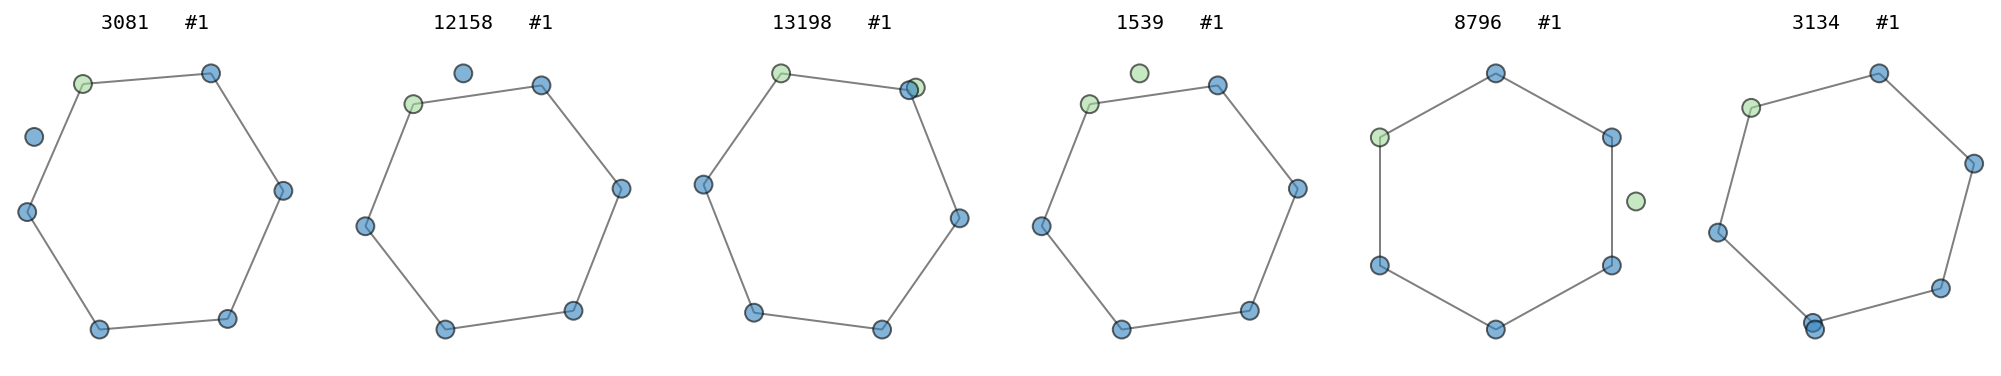

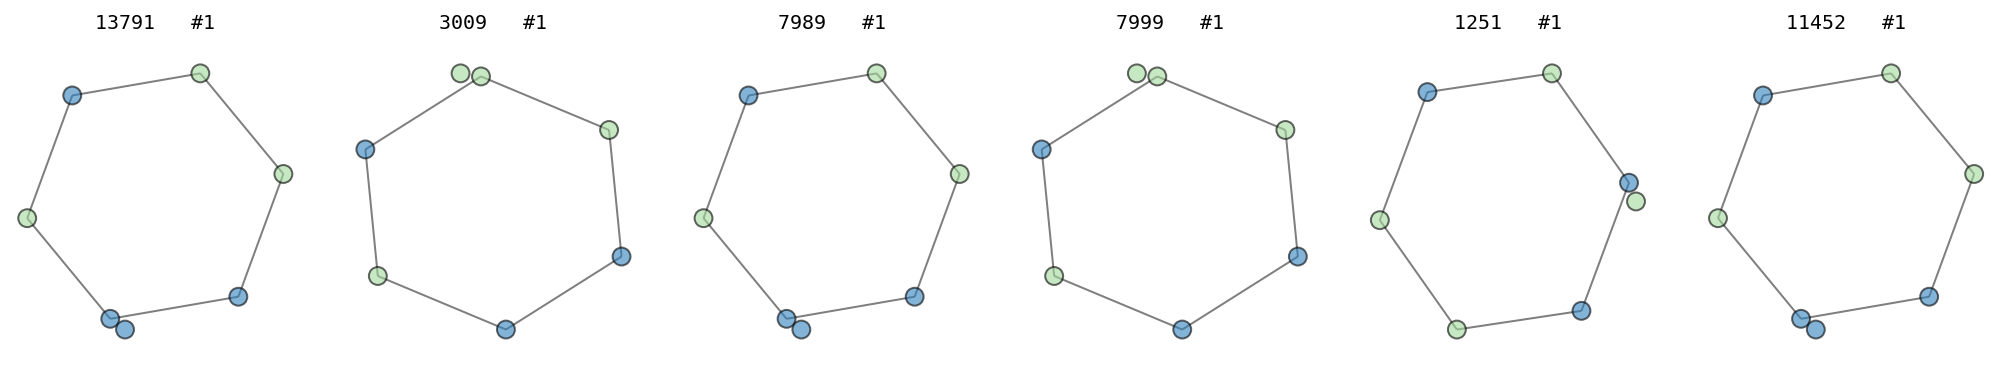

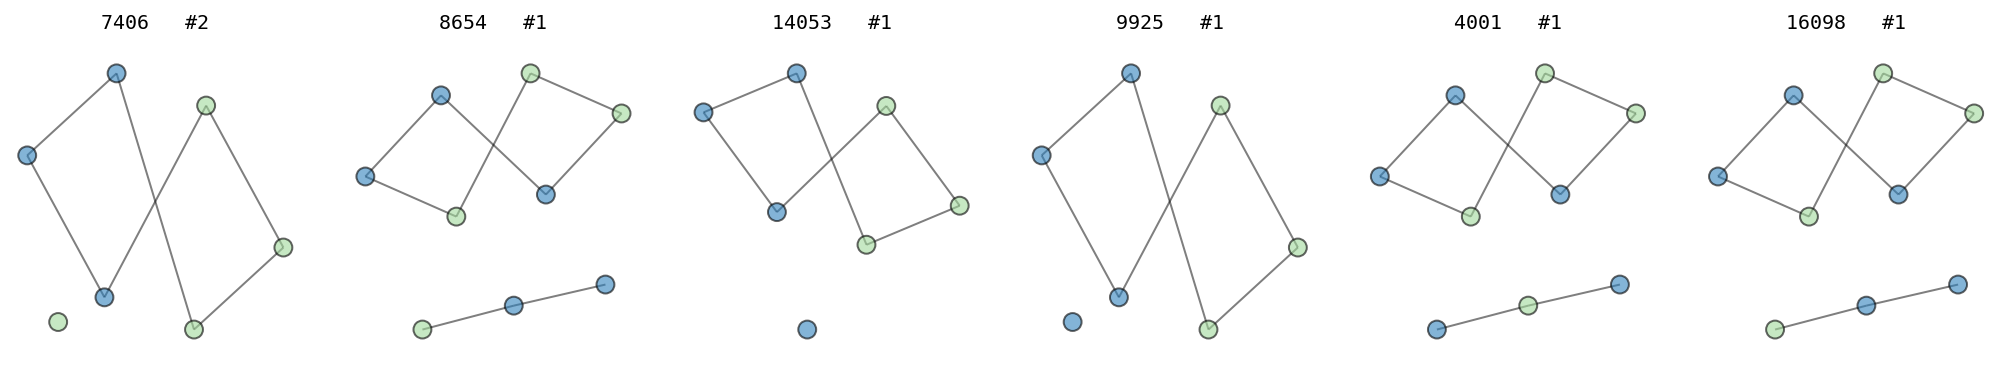

________________________________________________________________________________


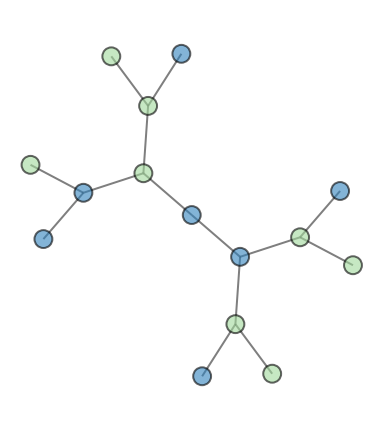

0 unique components in 0 fragments
No fragments


In [12]:
df = do_decompose(decompose_cycles, decompose_neighborhood, aggregate_function=decompose_pair_binary(distance=2), compose_function=decompose_identity)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


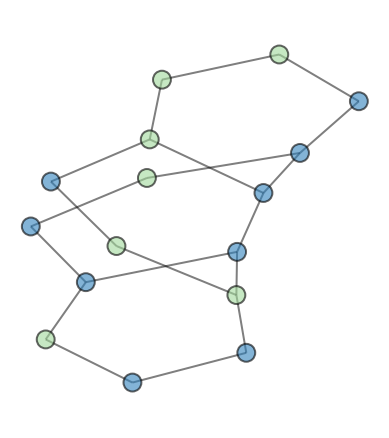

197 unique components in 204 fragments


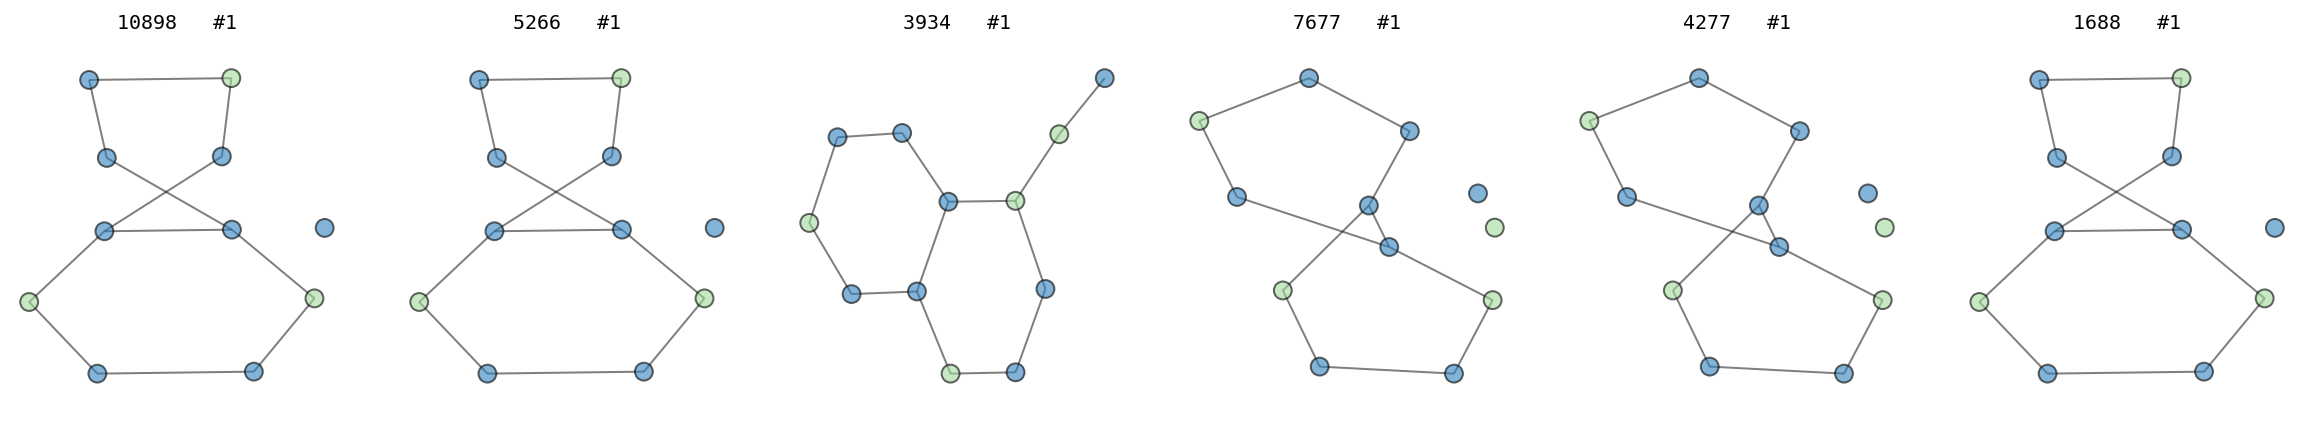

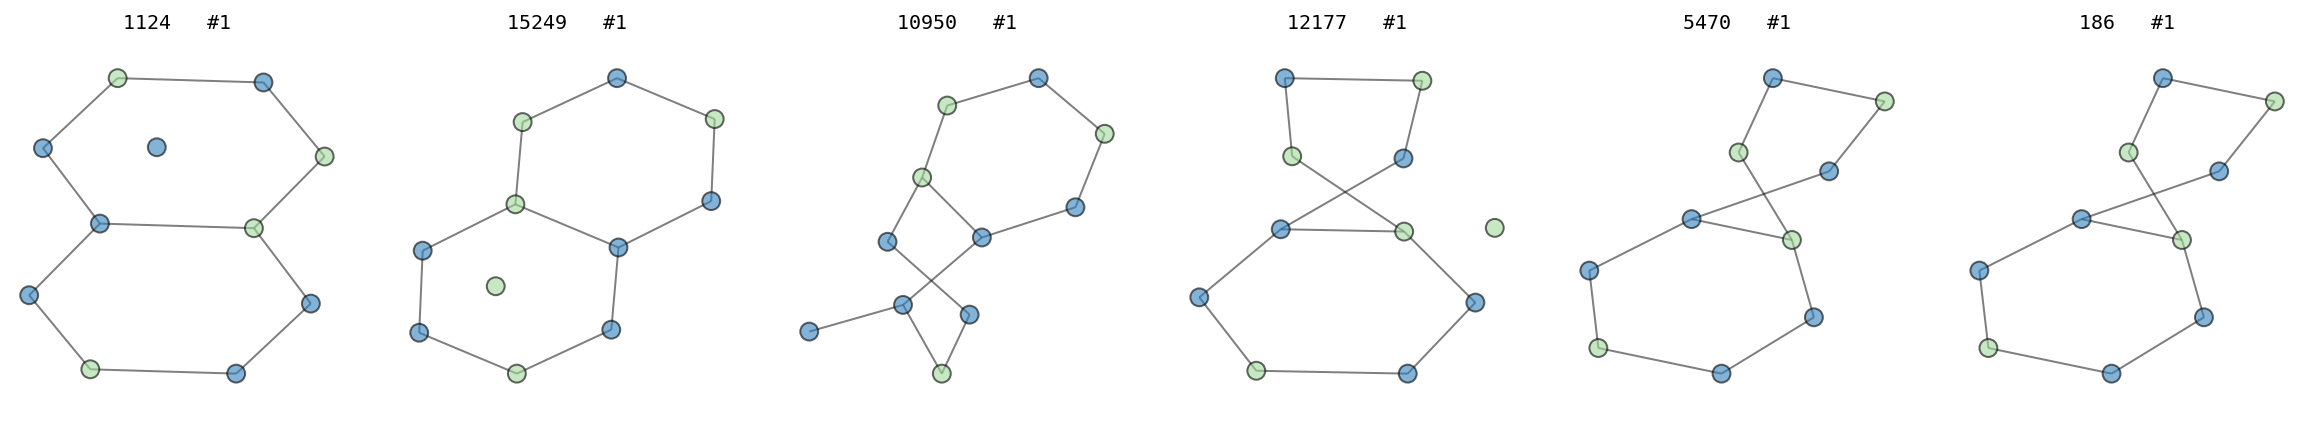

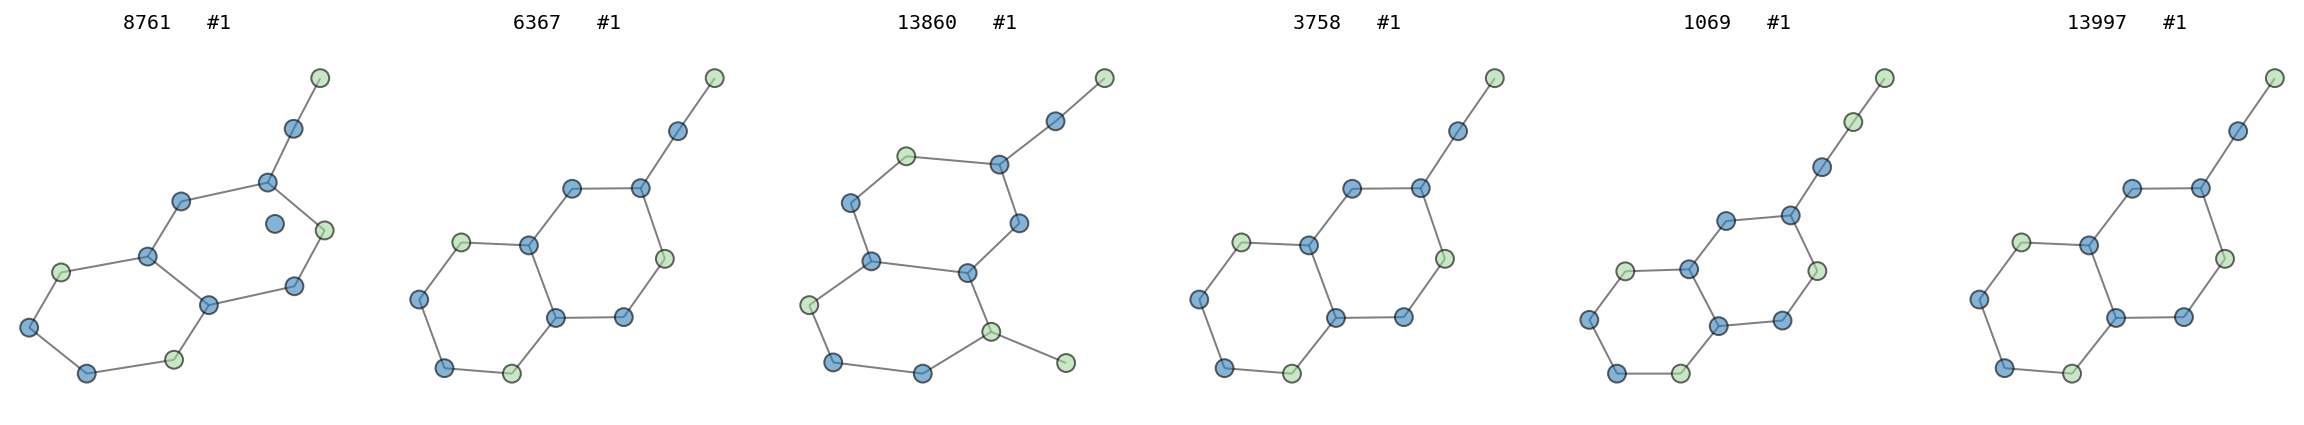

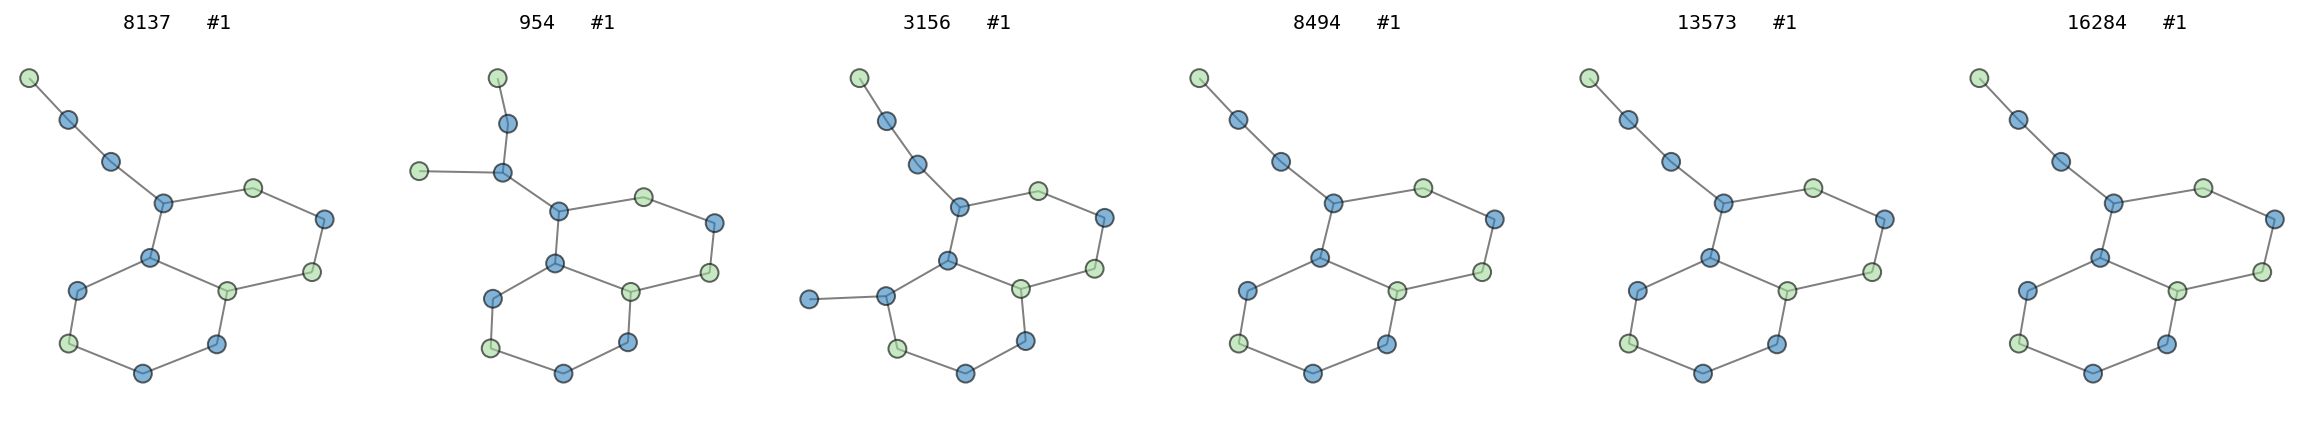

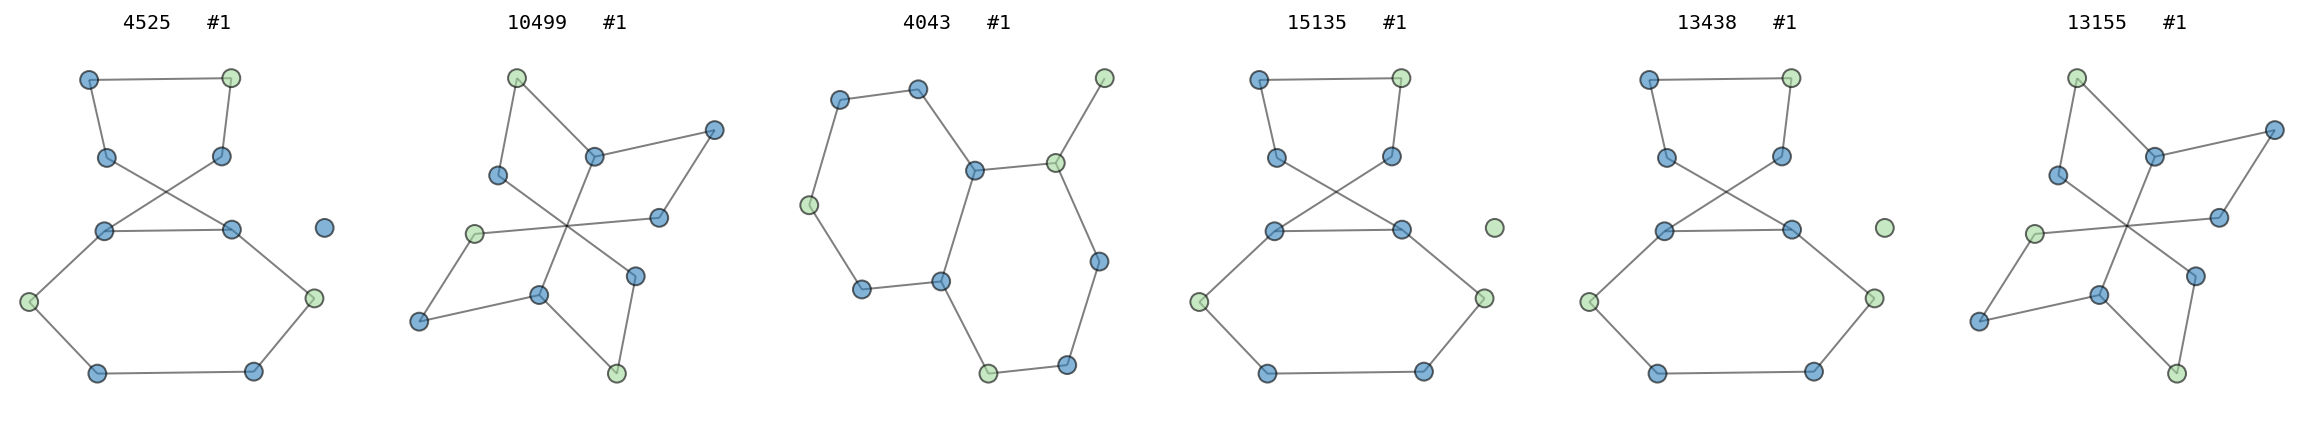

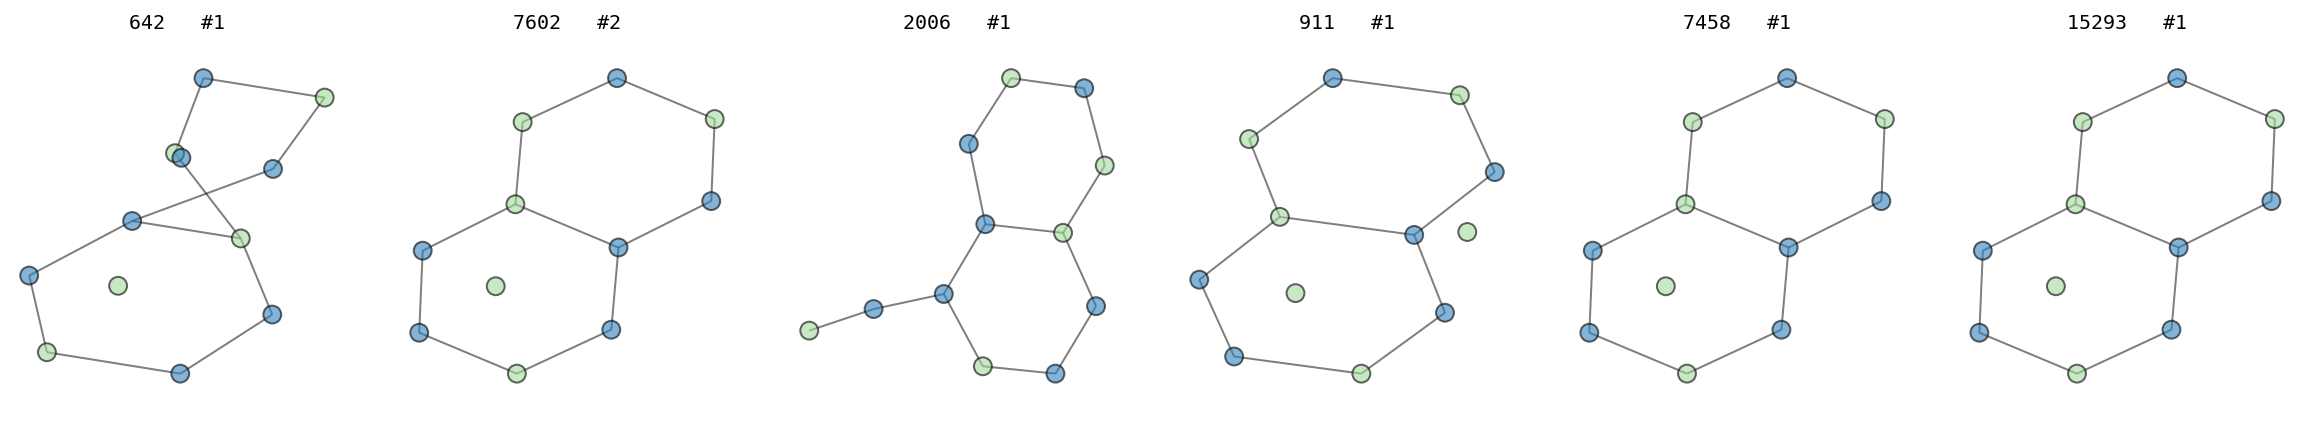

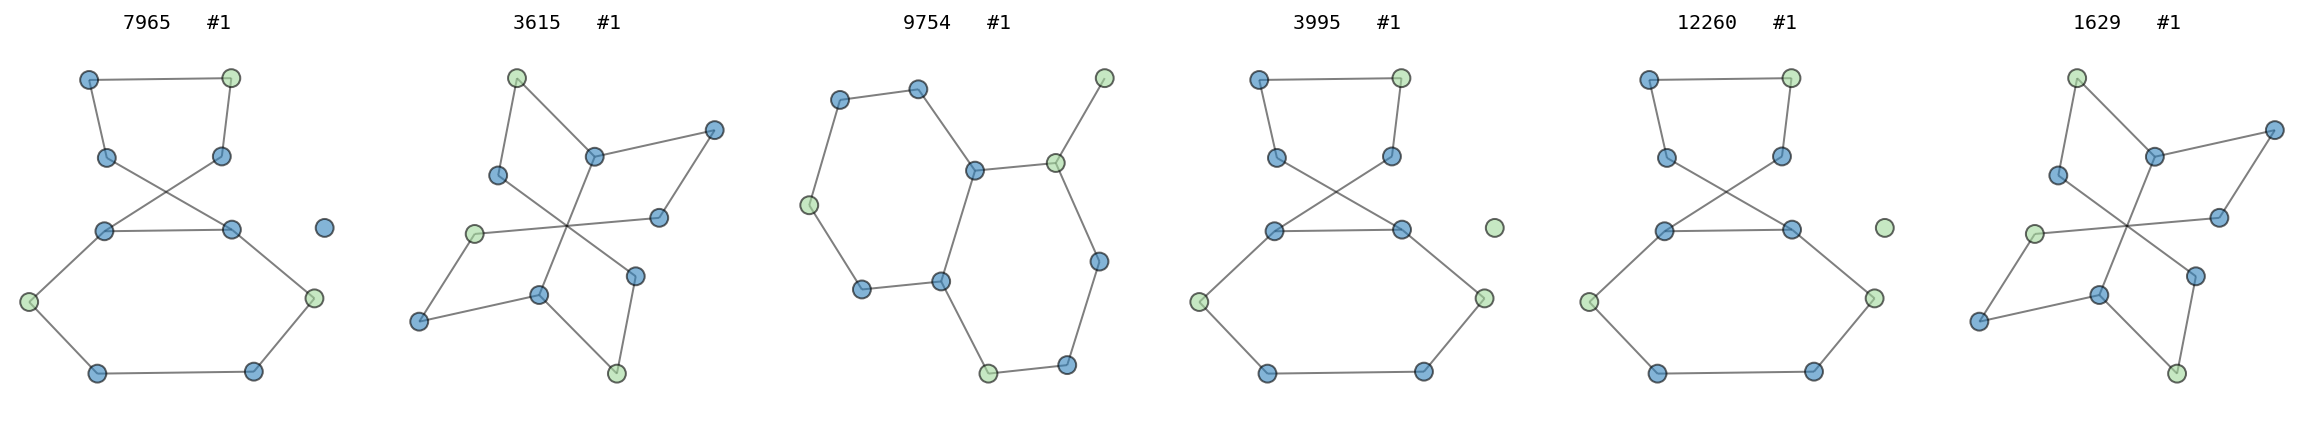

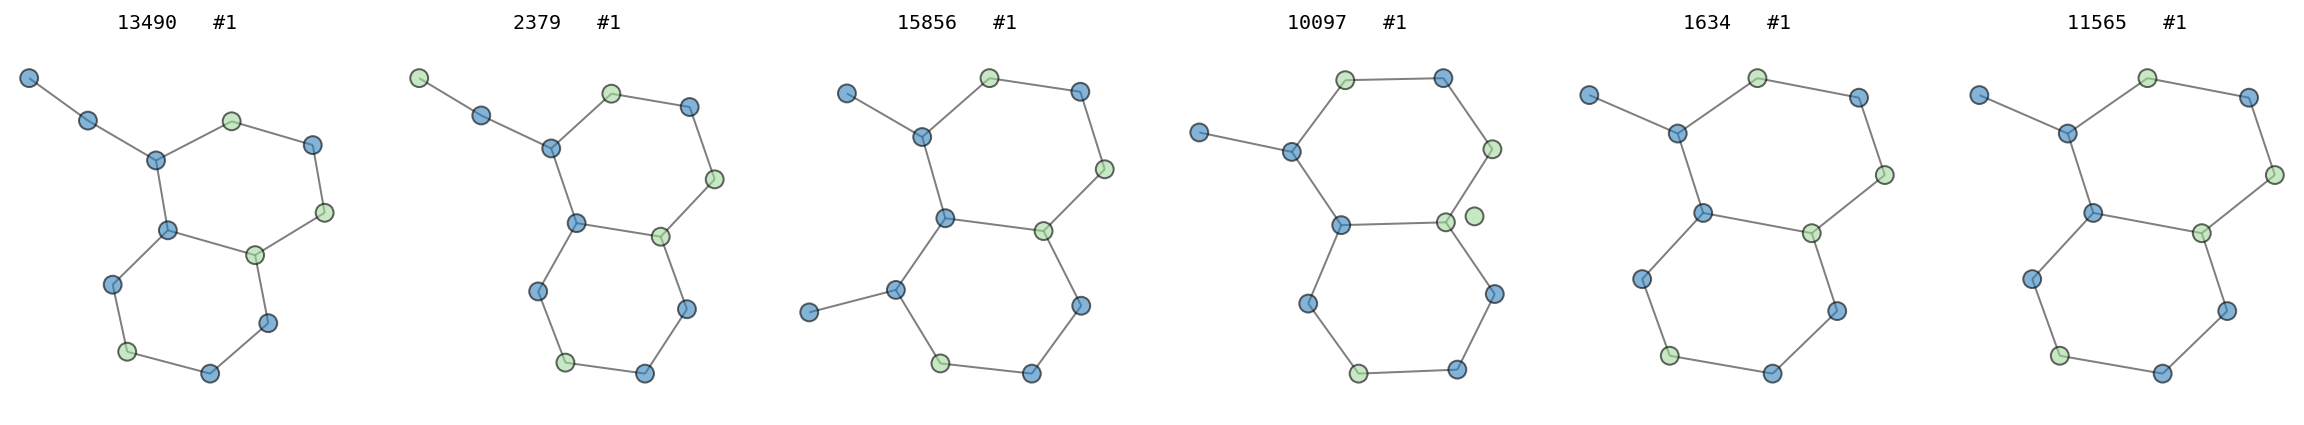

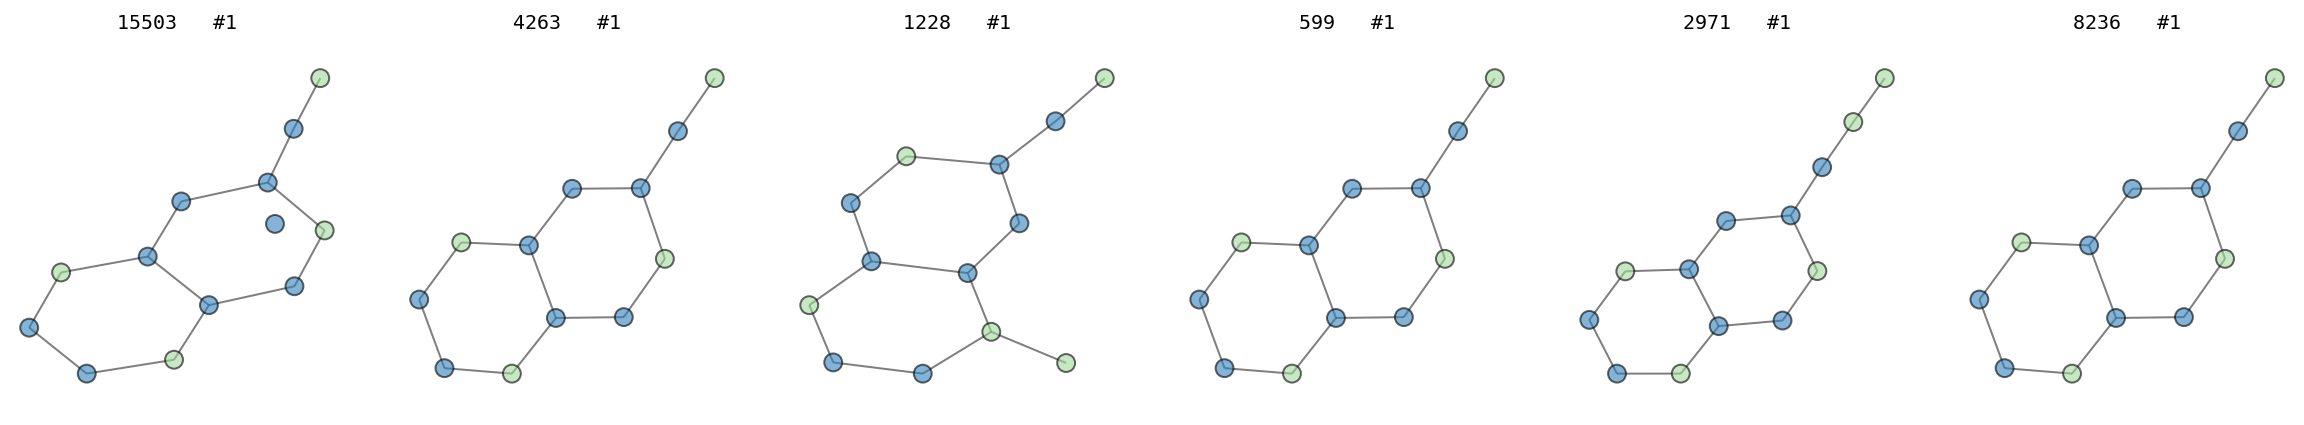

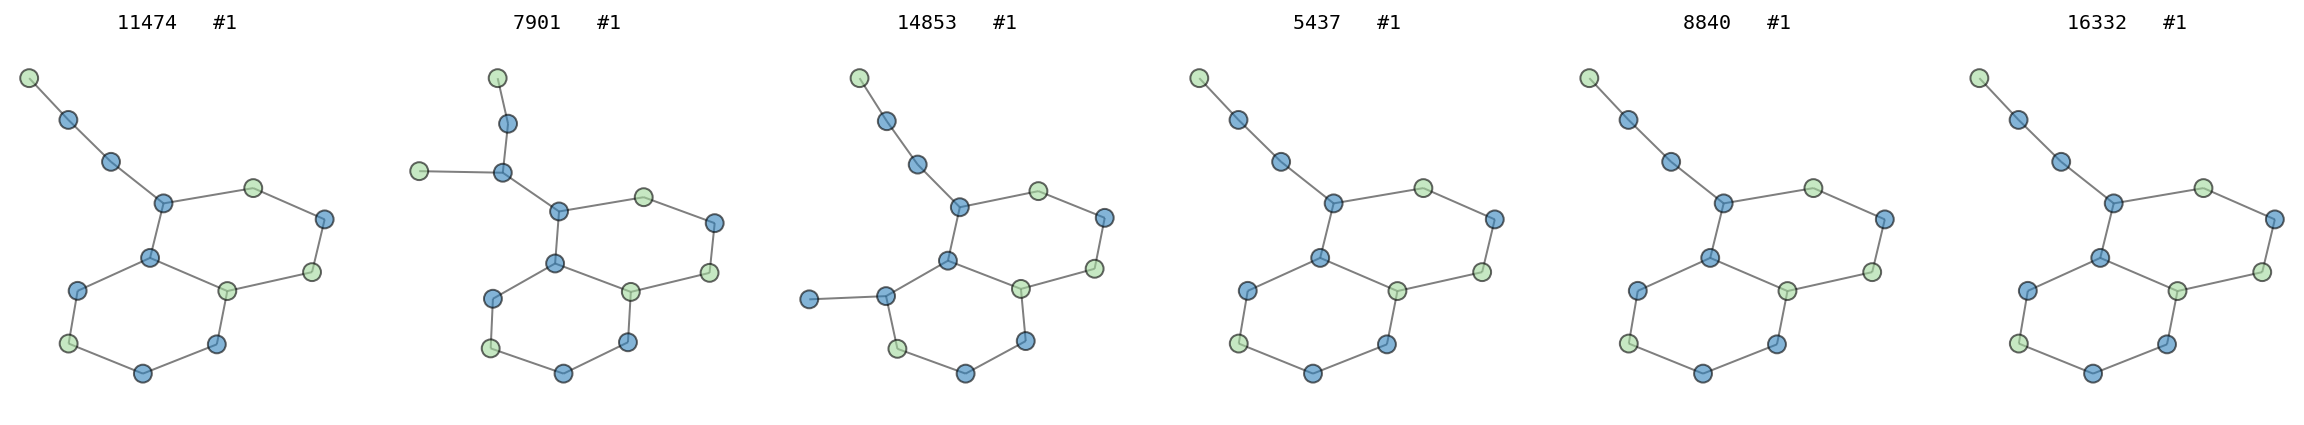

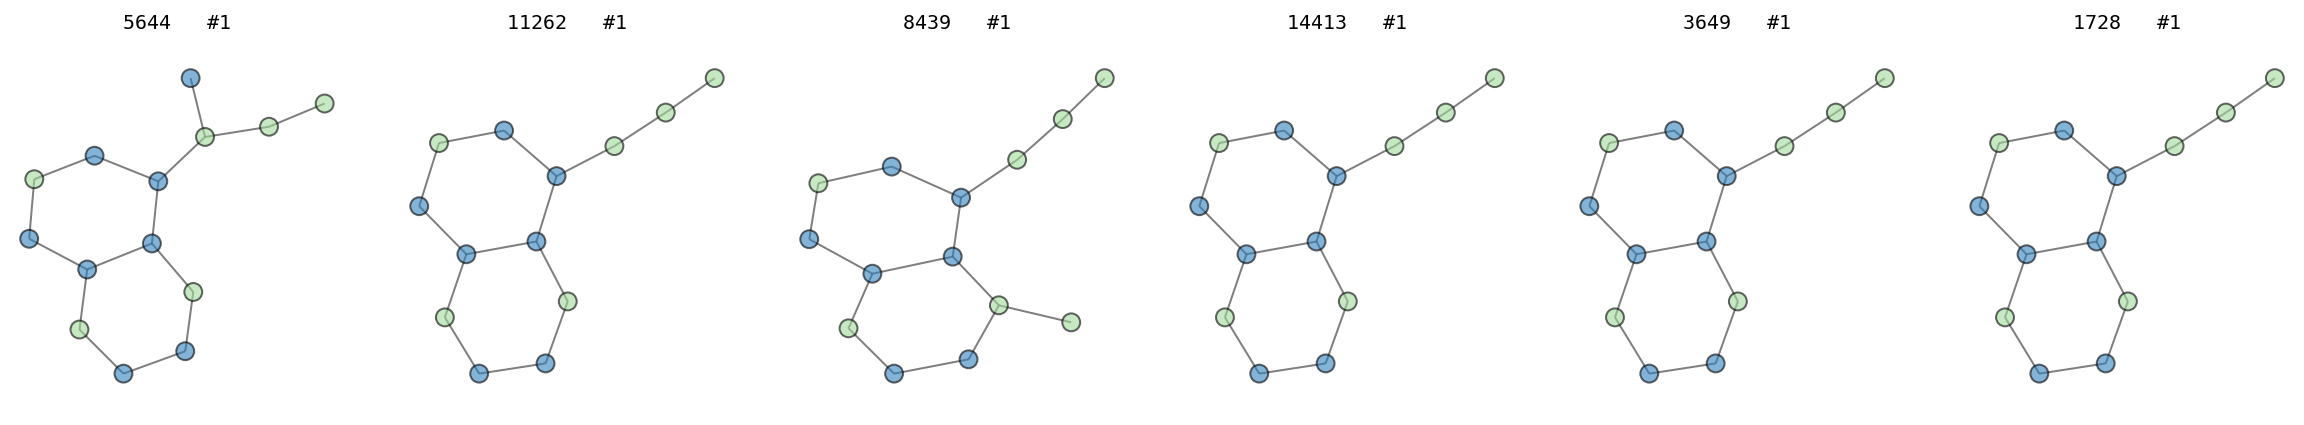

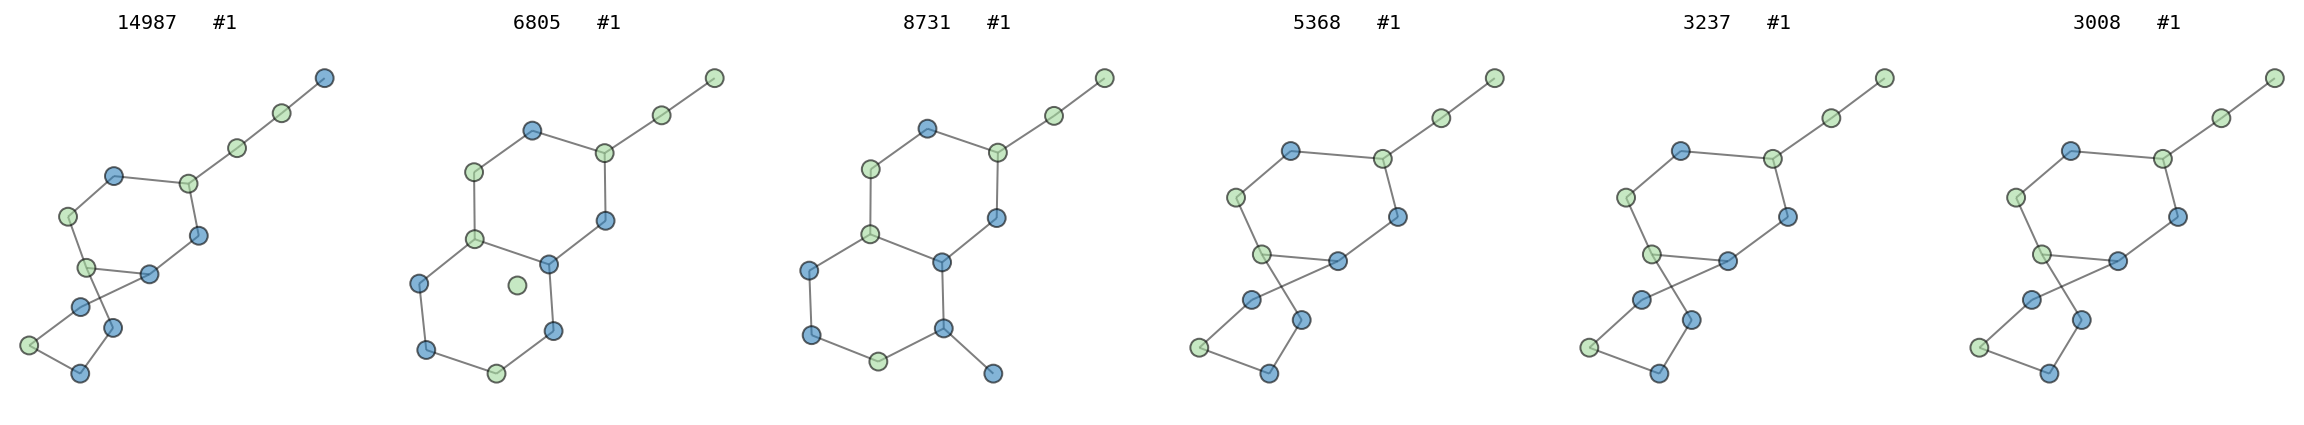

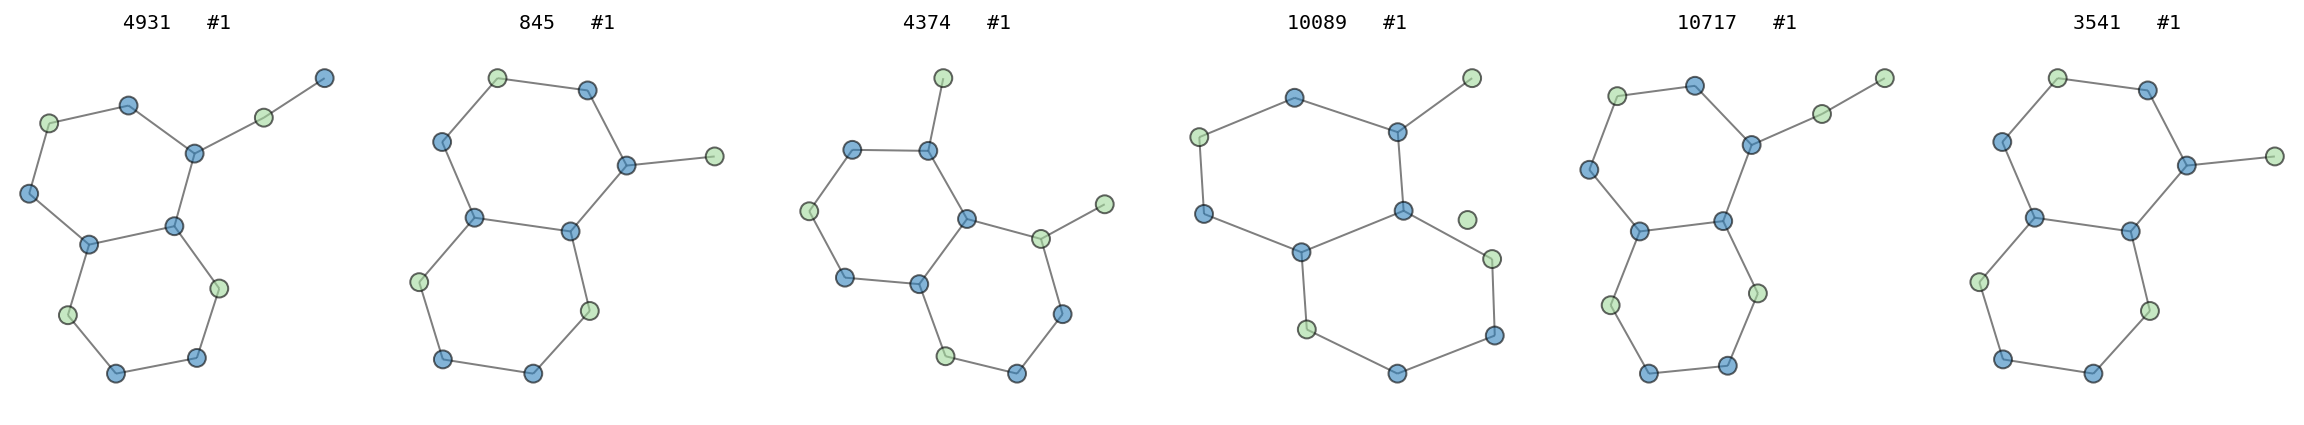

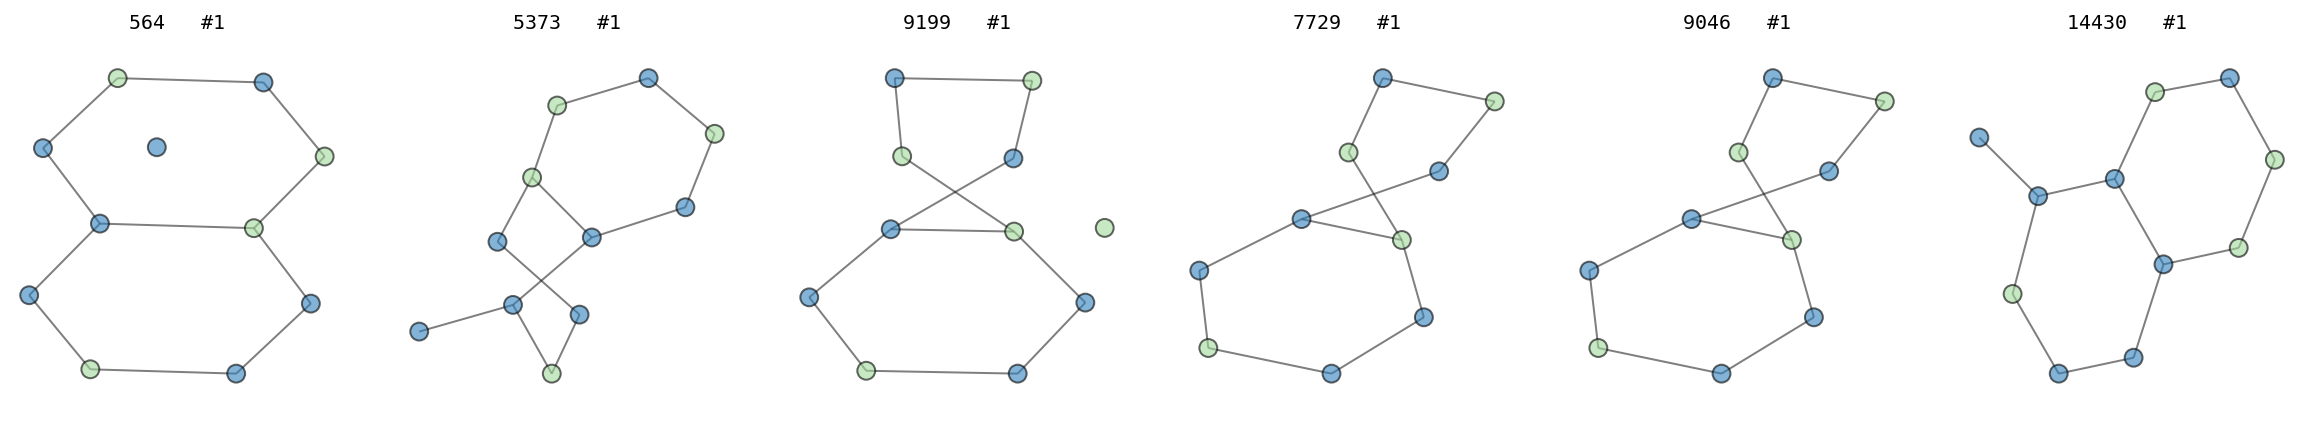

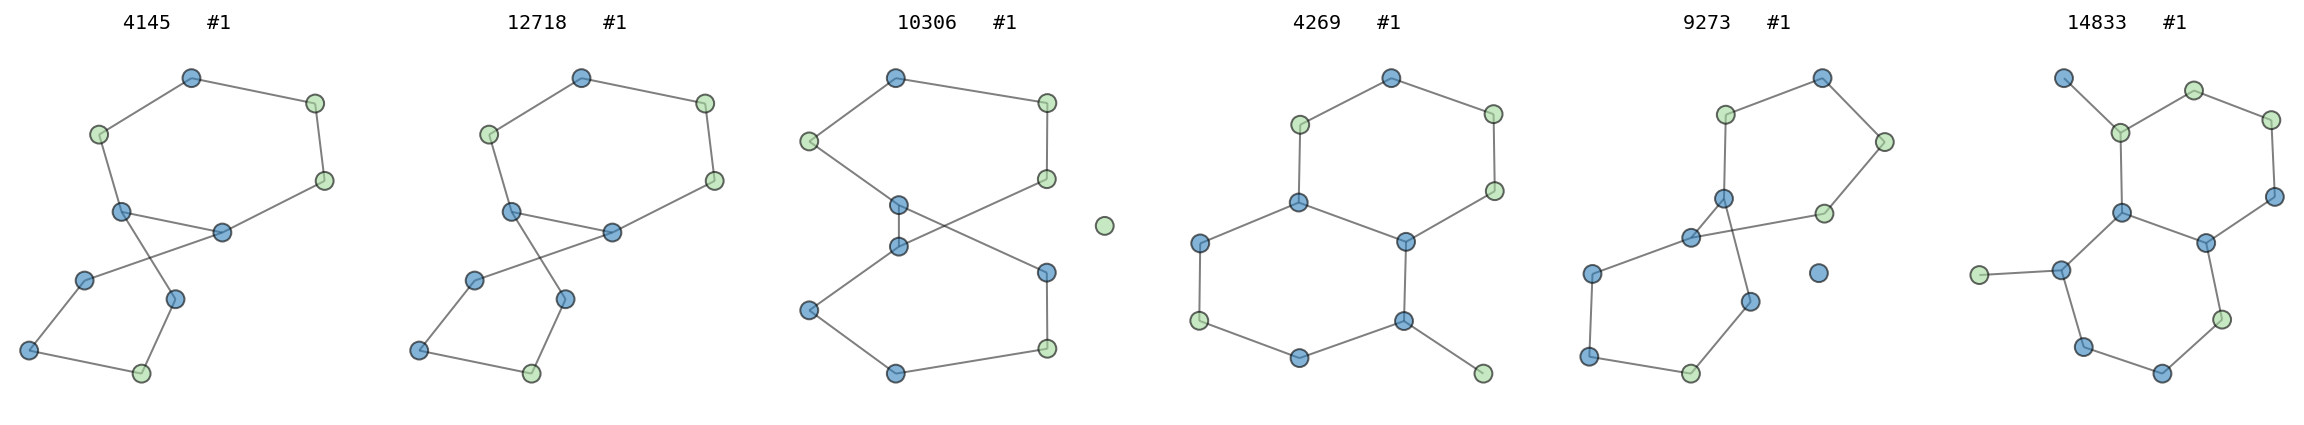

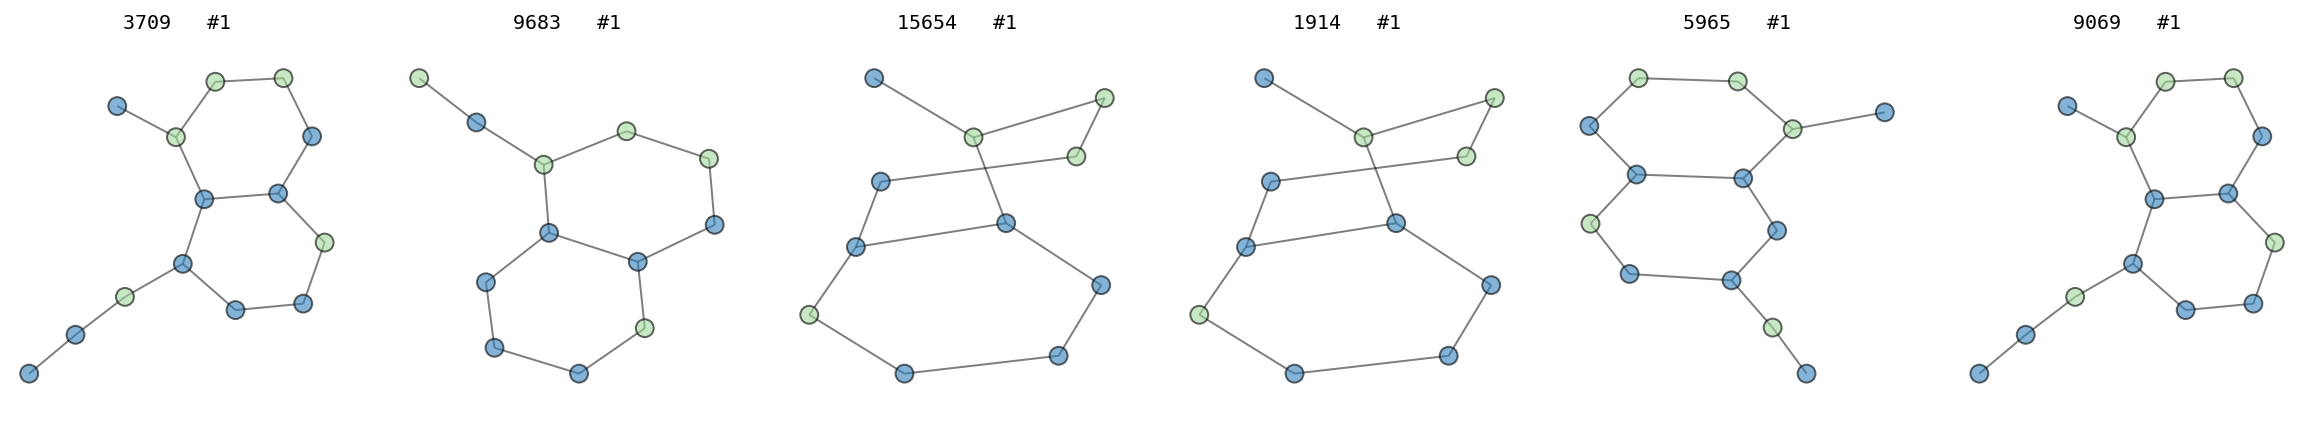

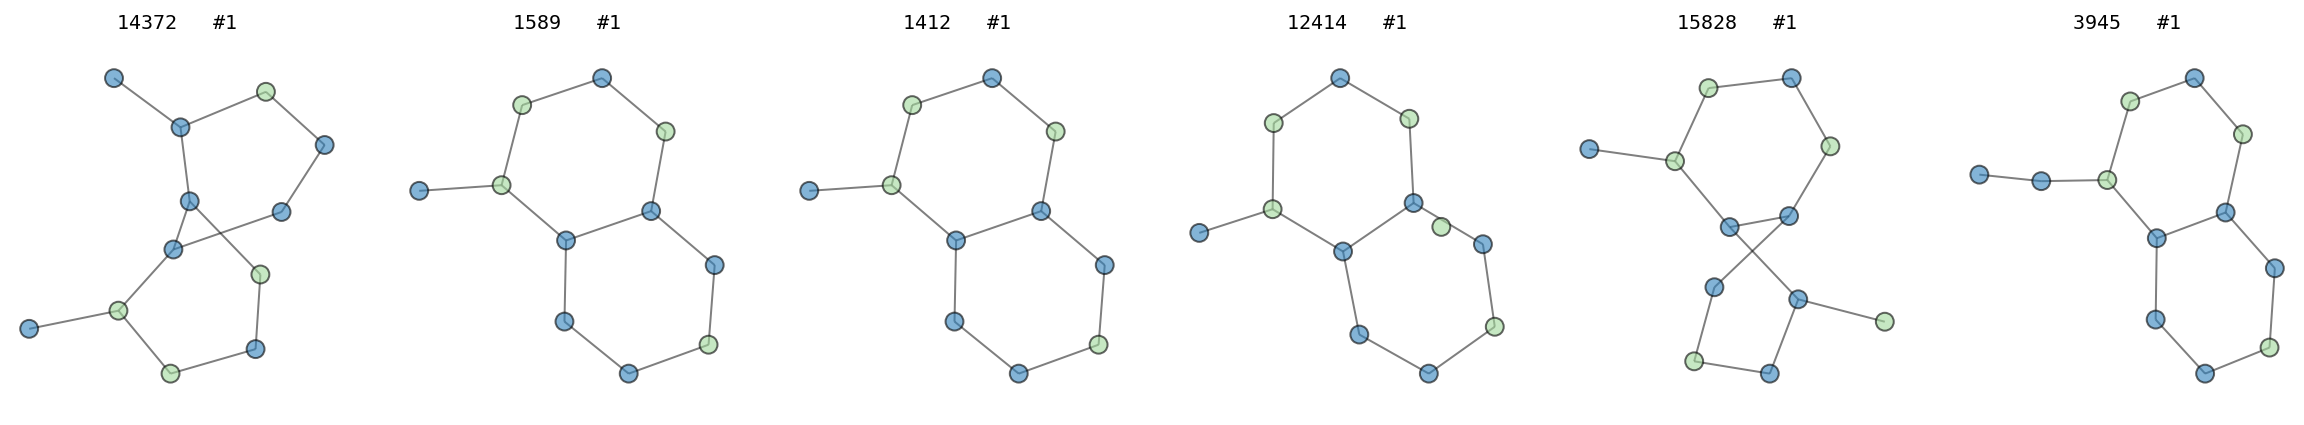

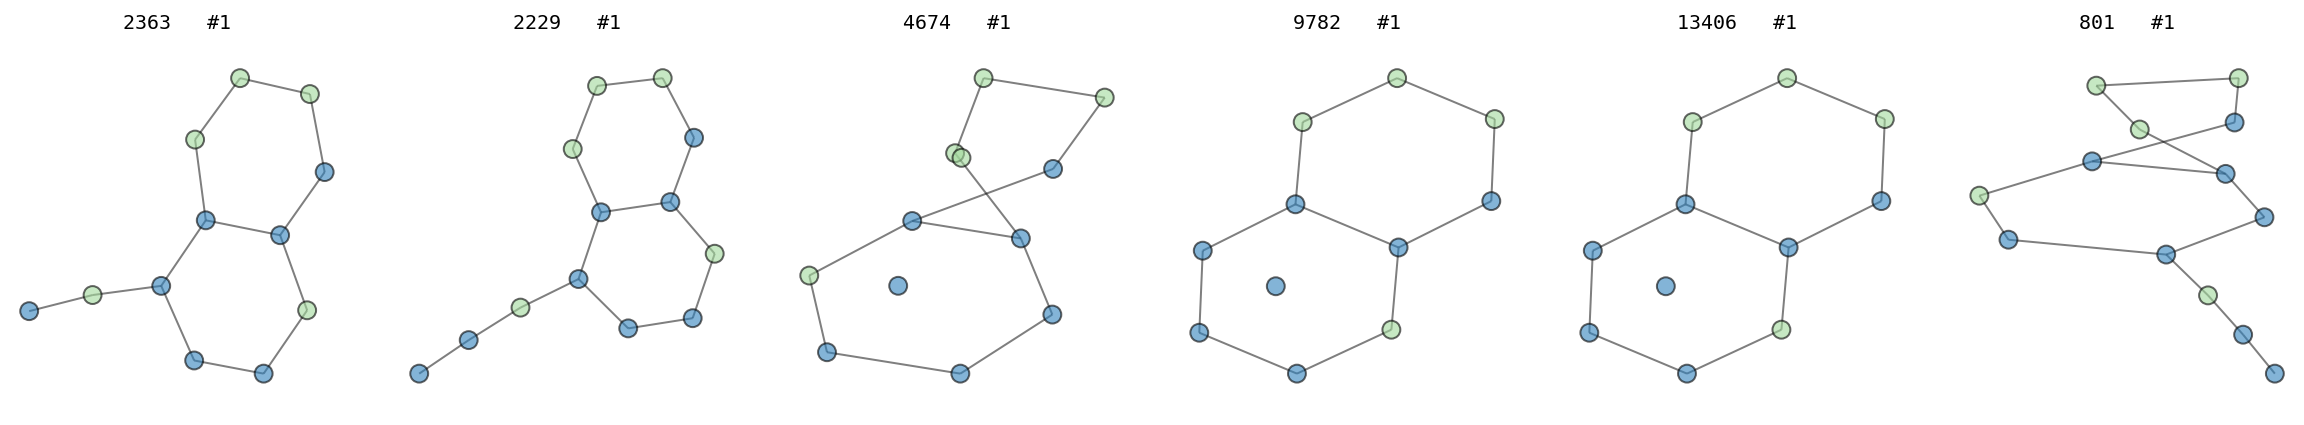

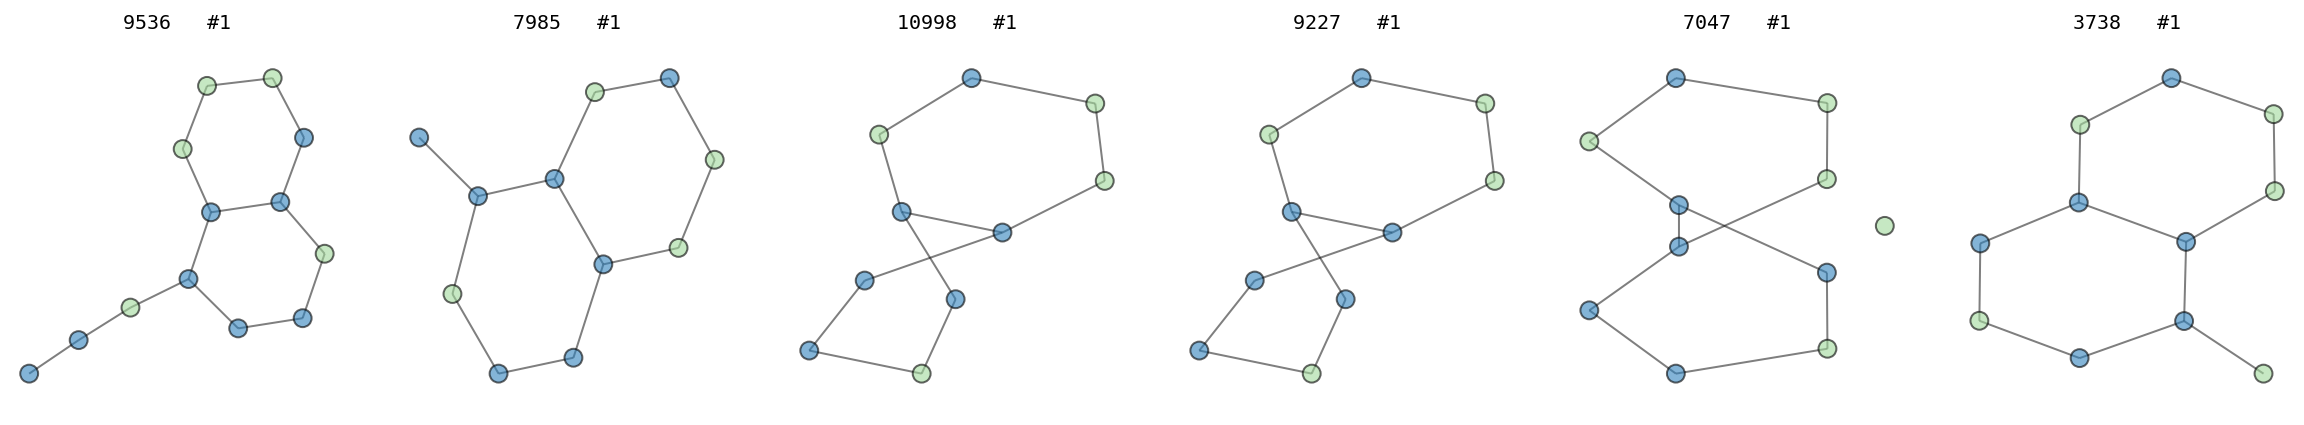

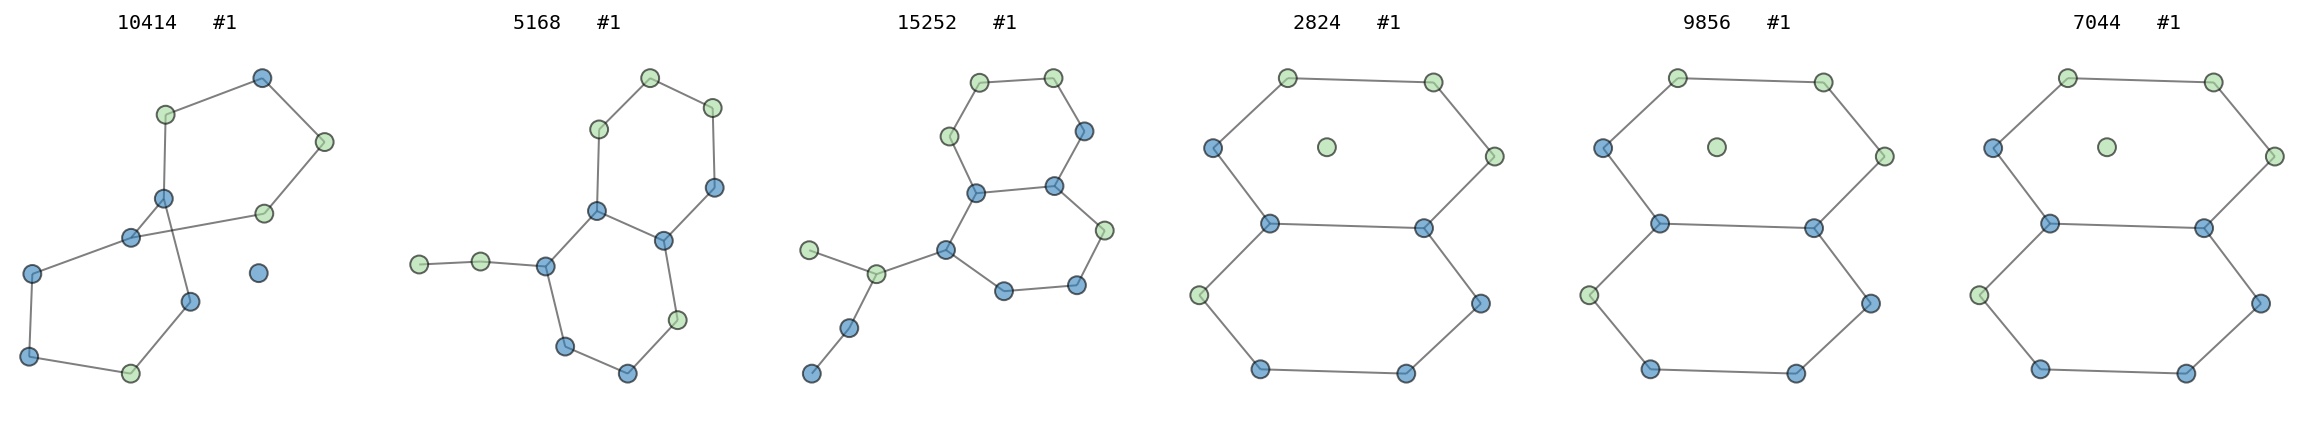

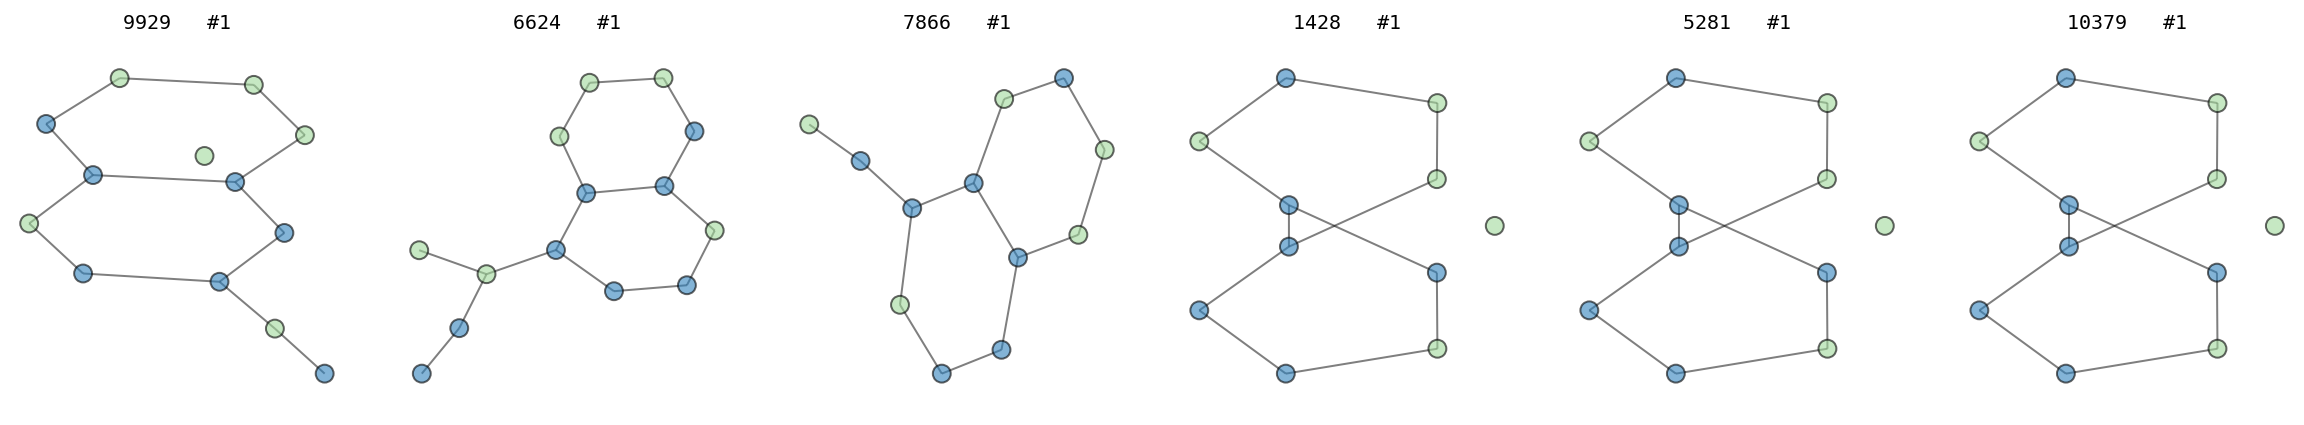

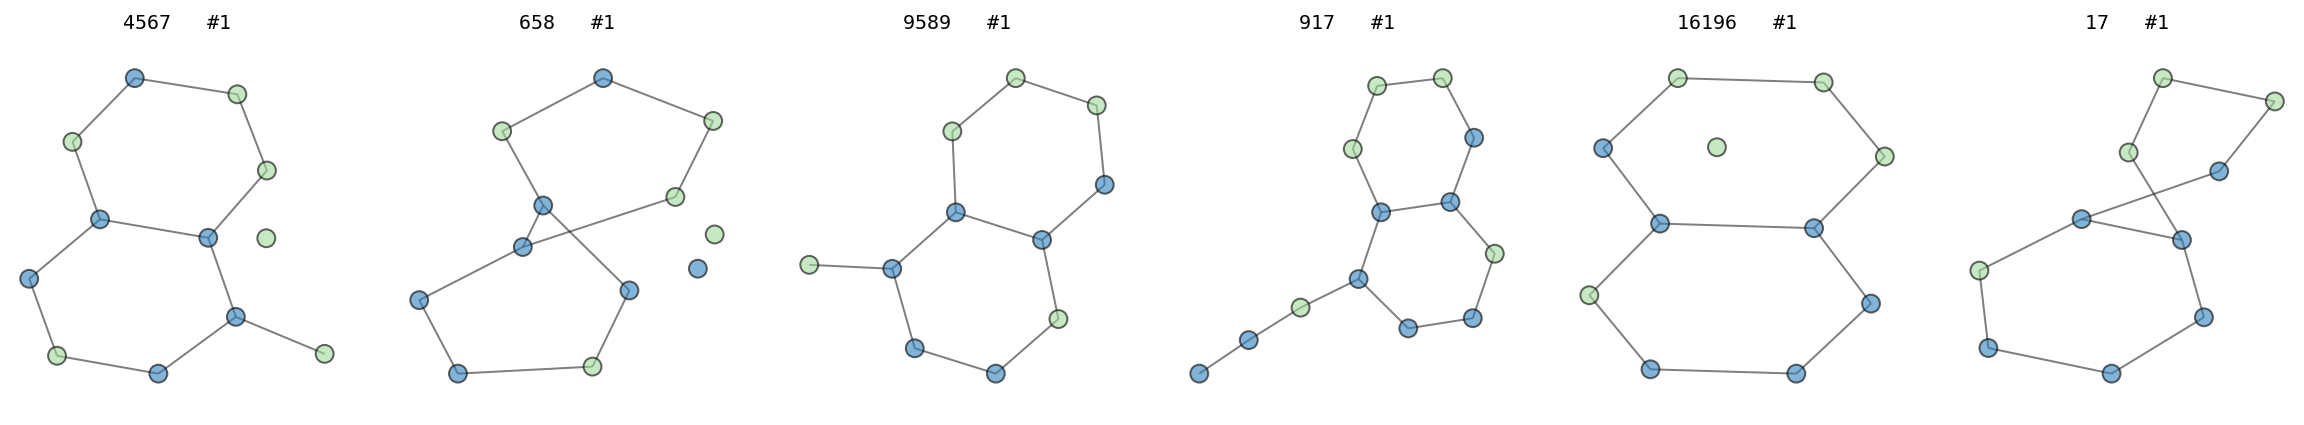

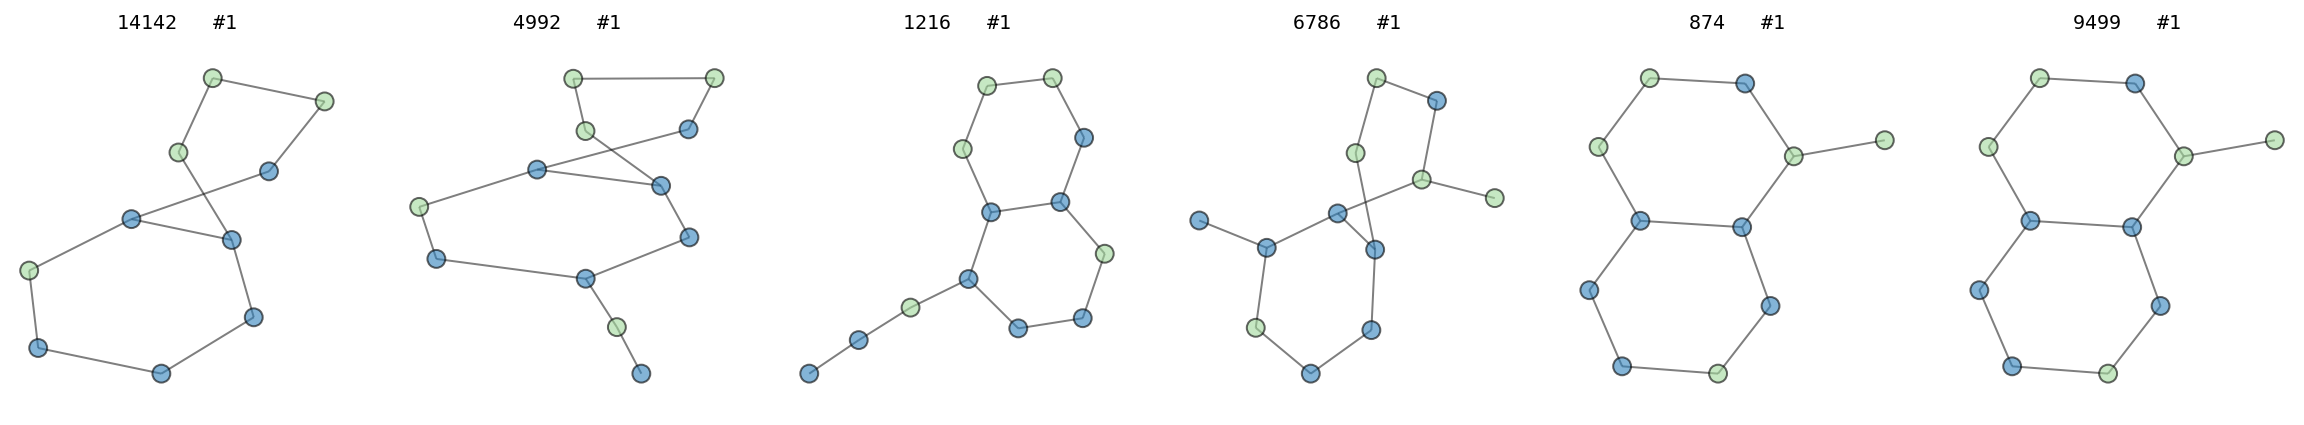

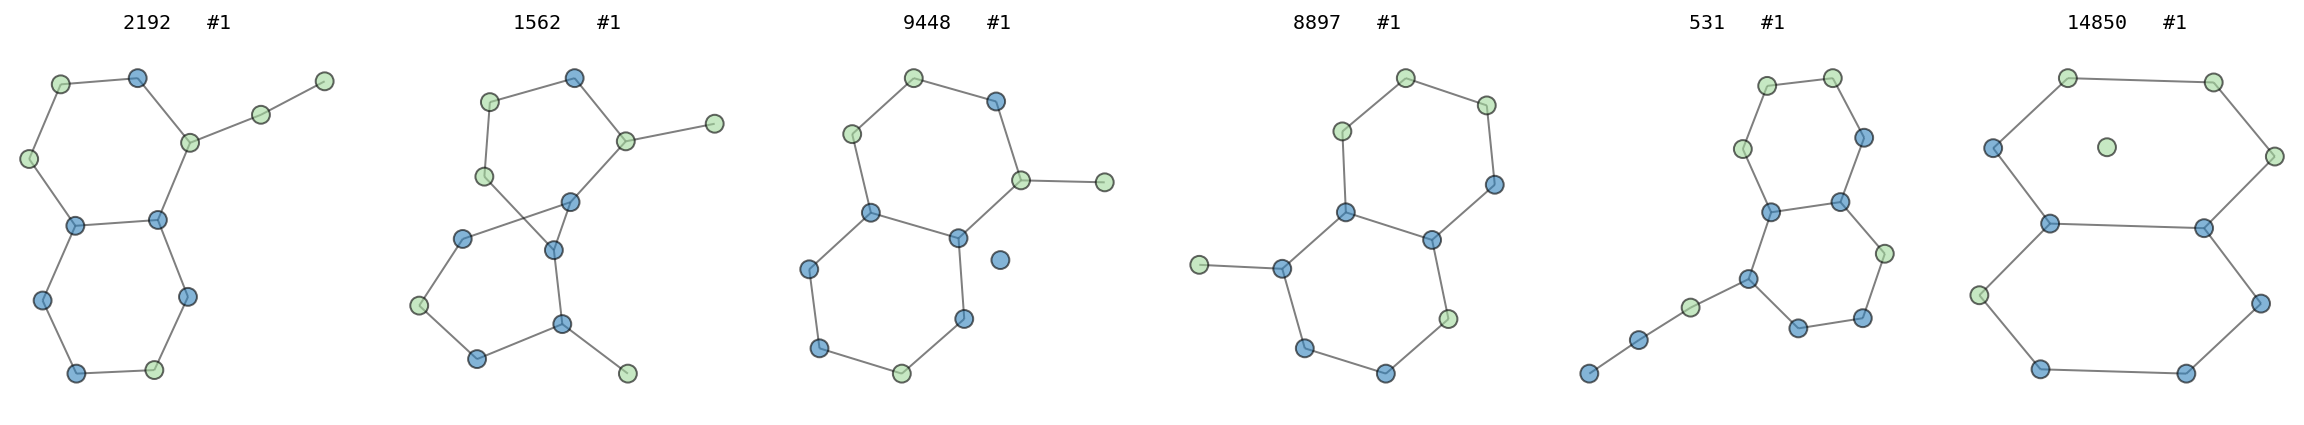

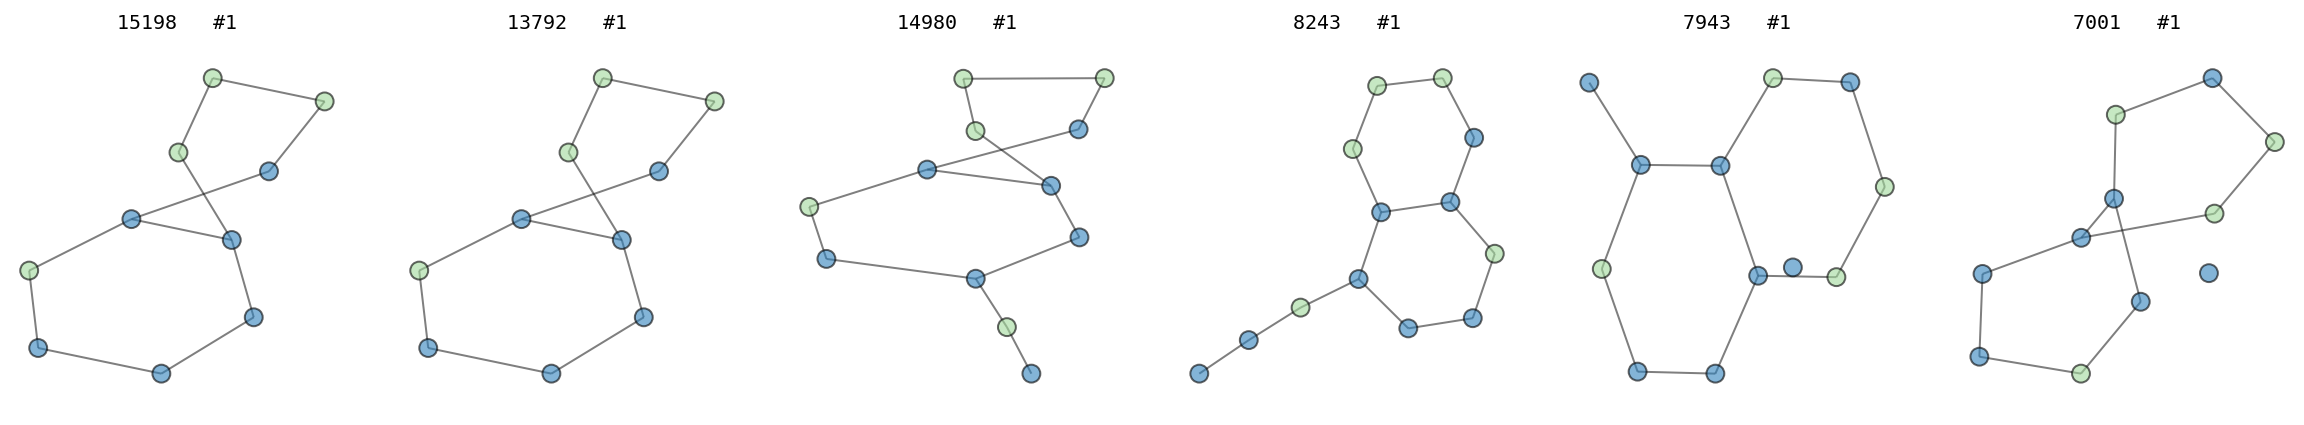

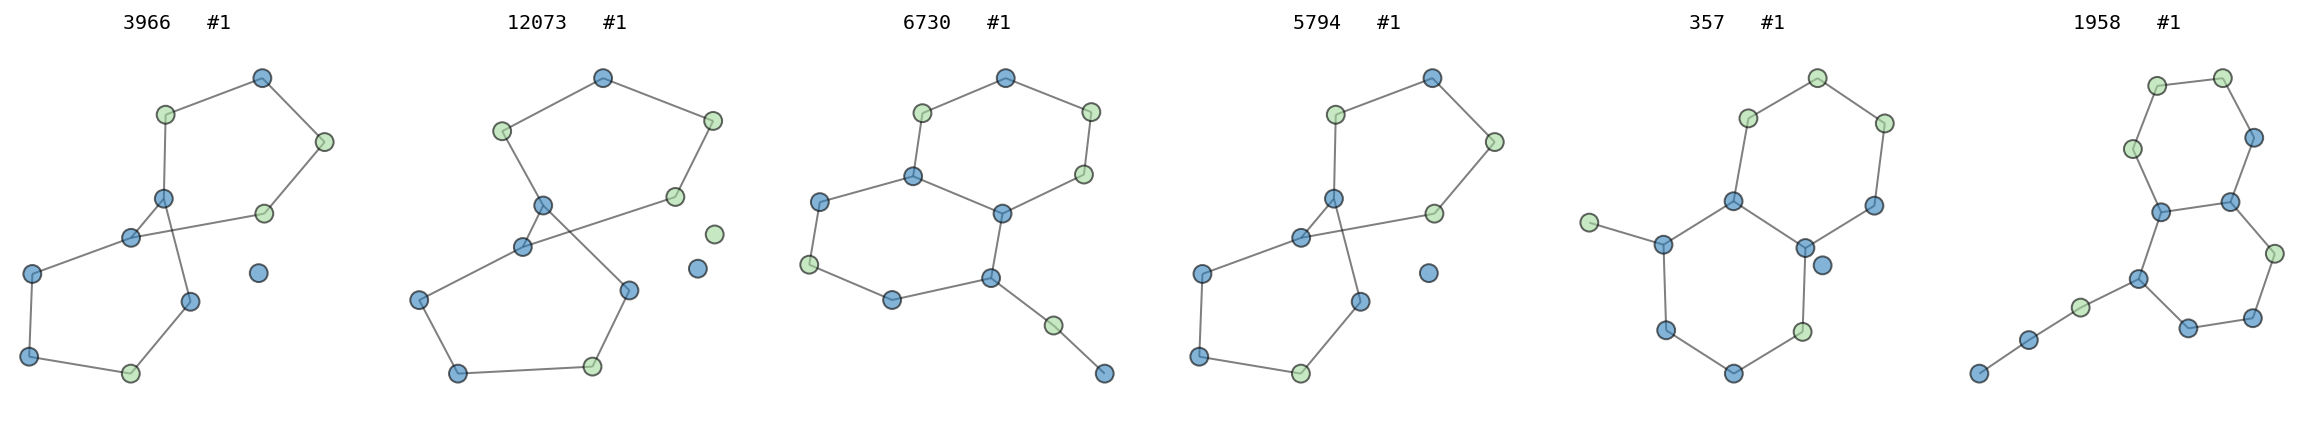

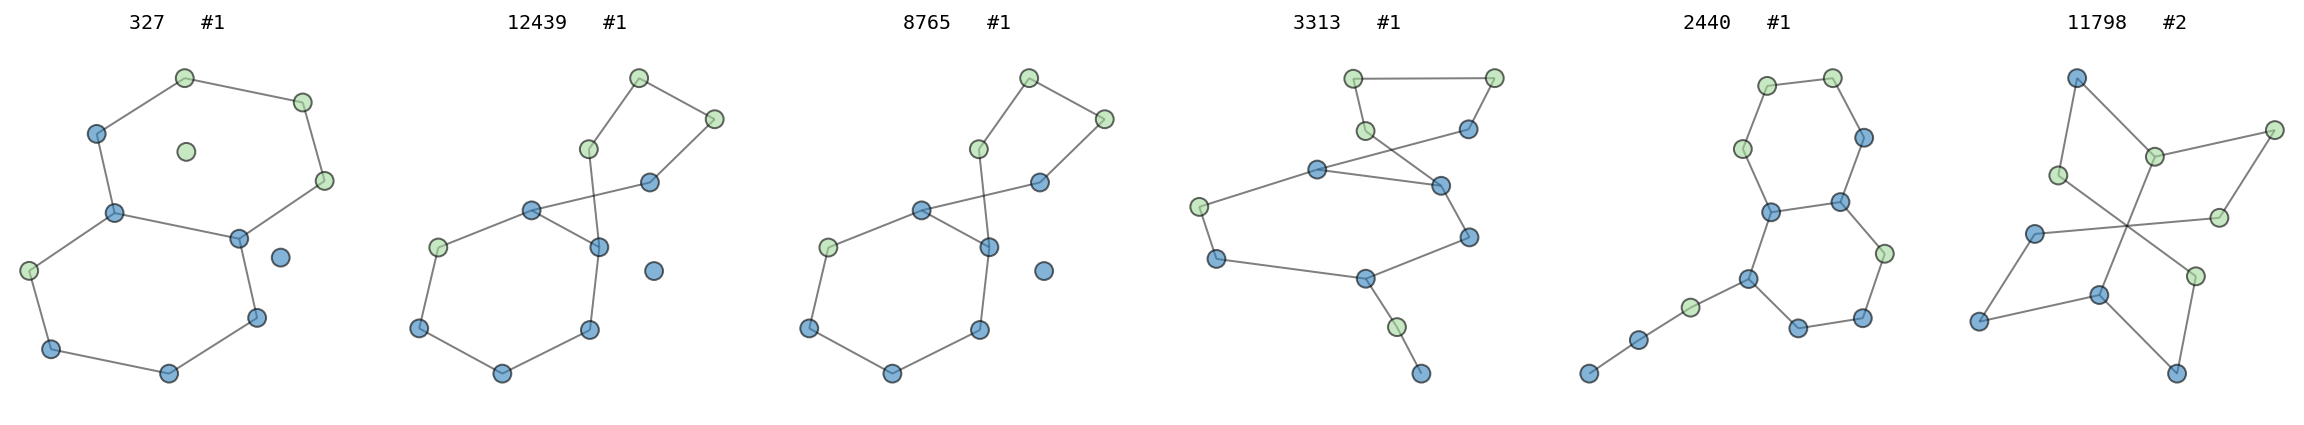

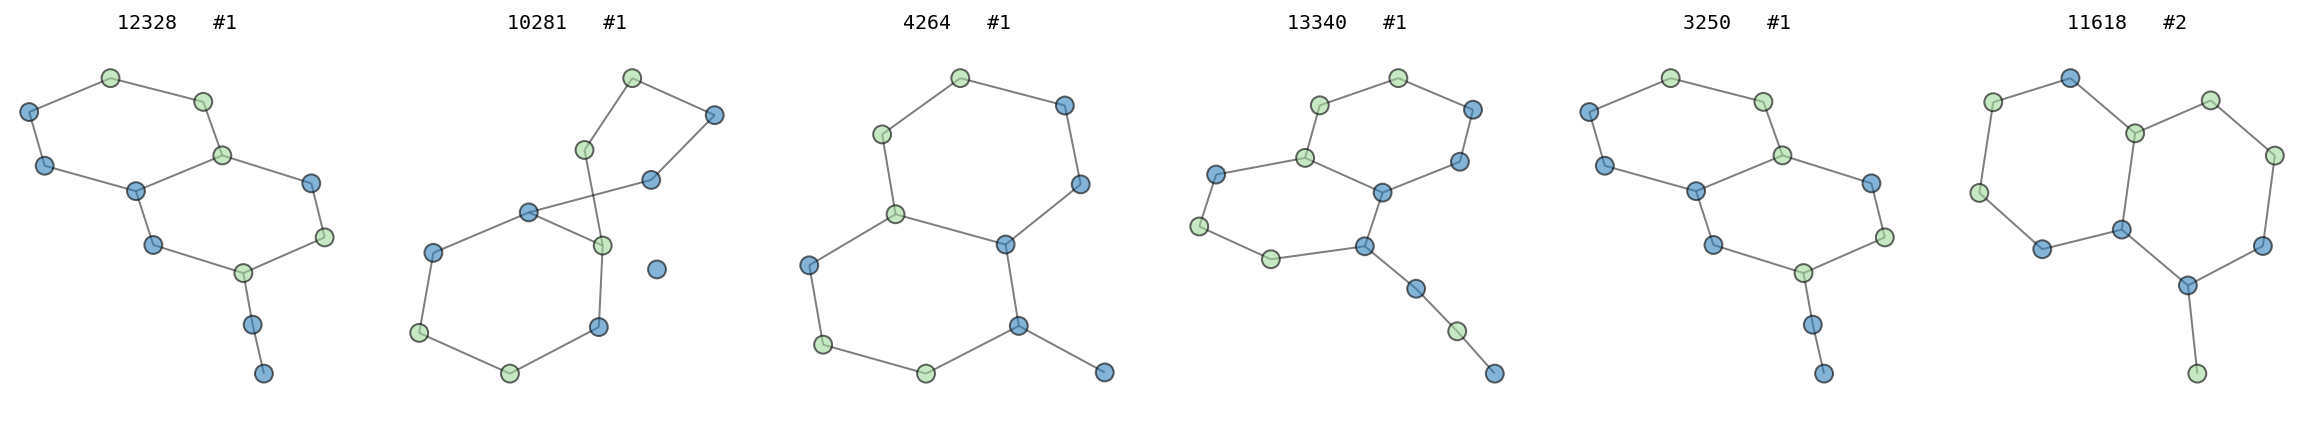

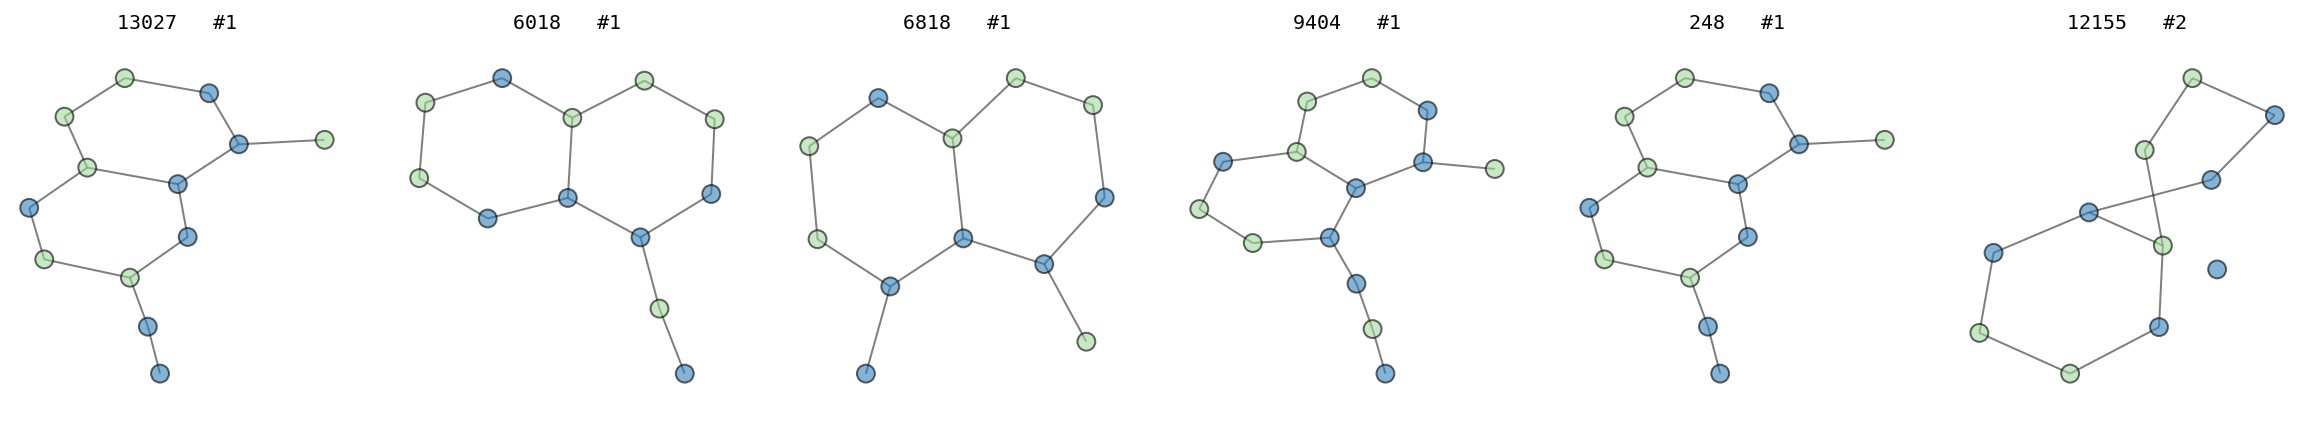

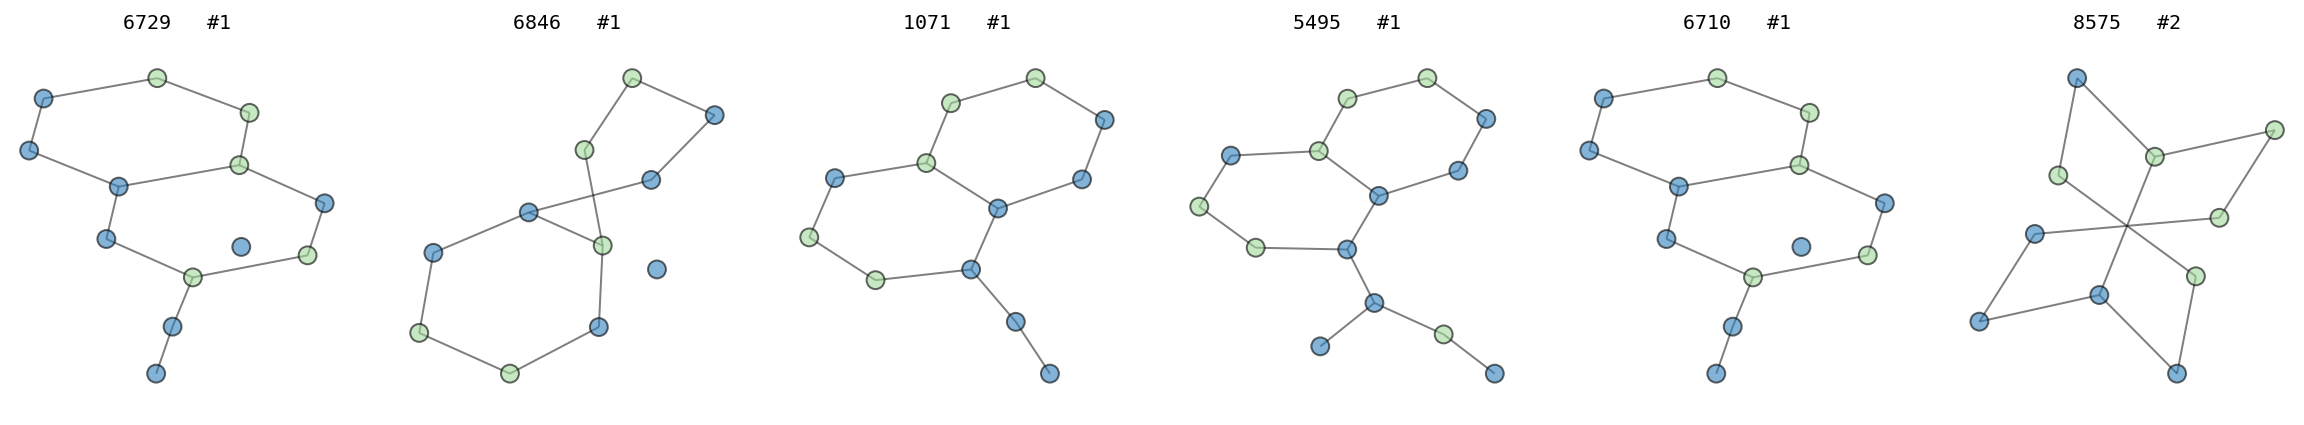

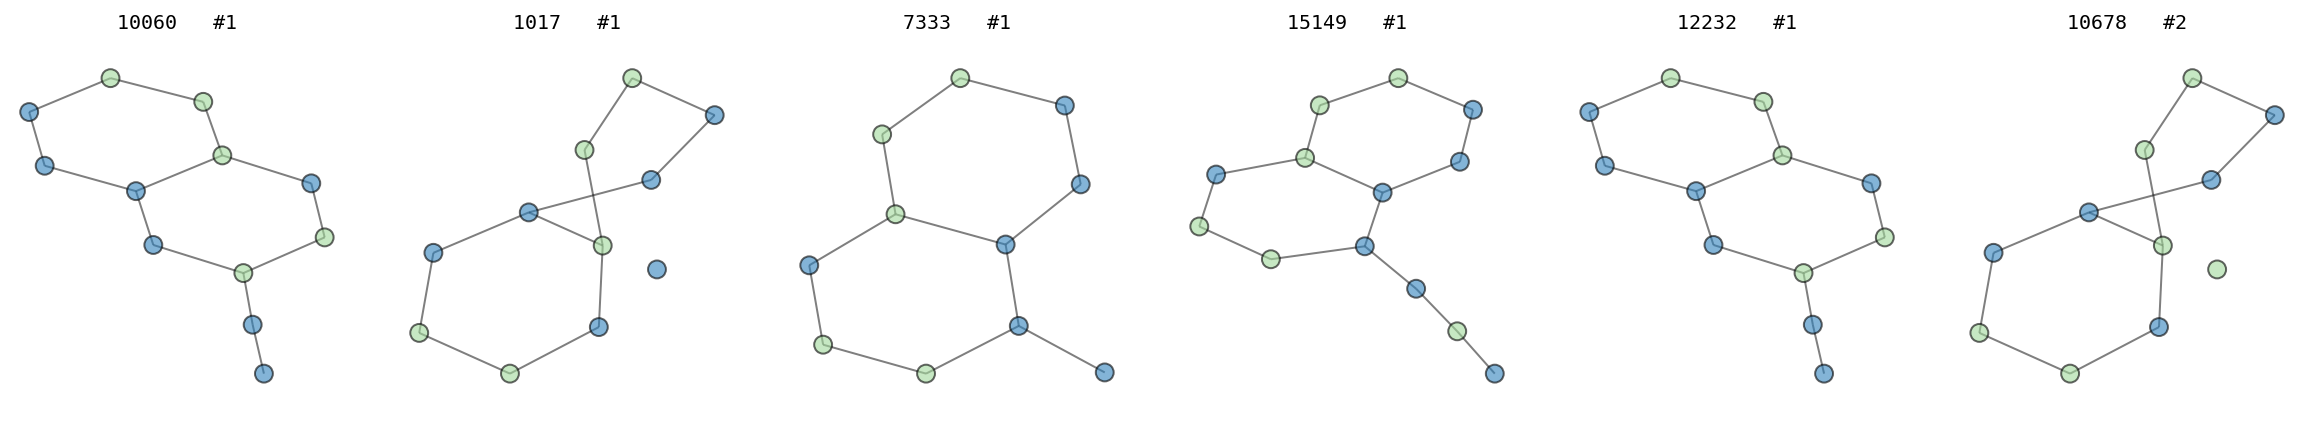

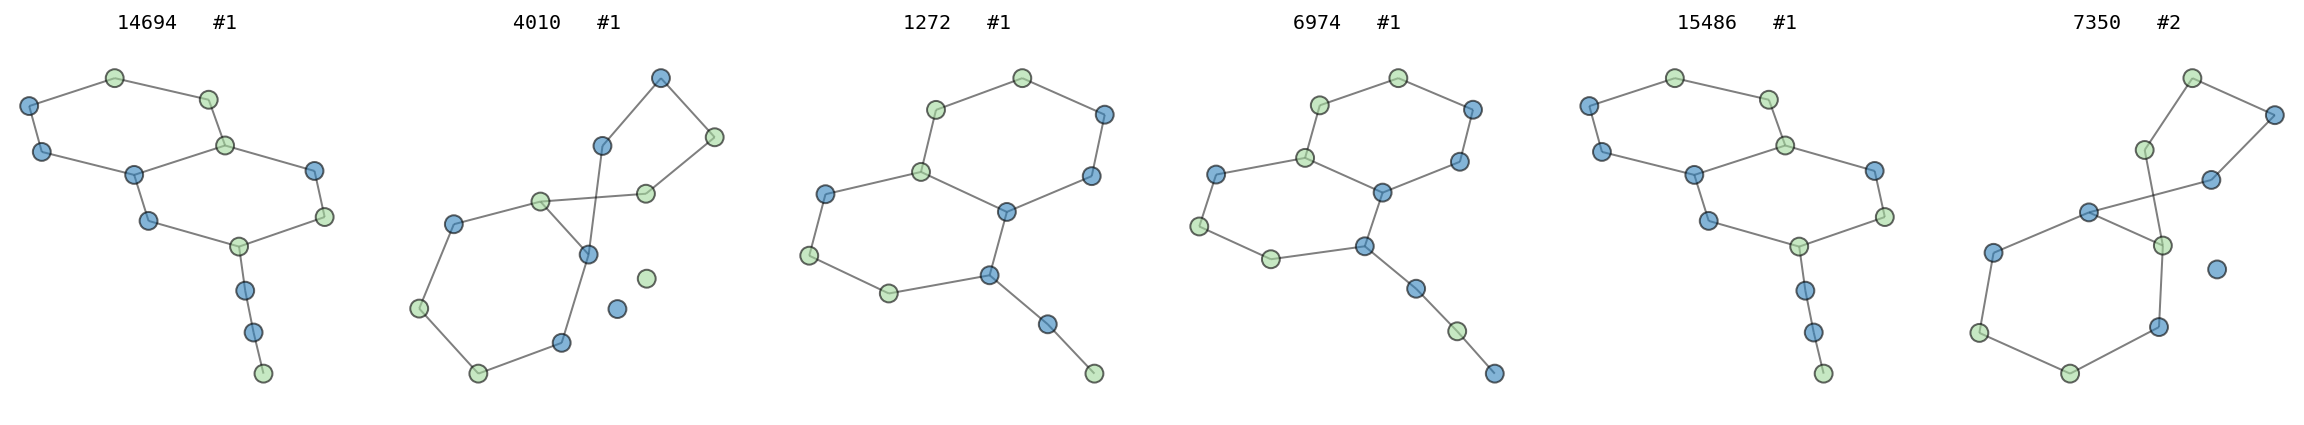

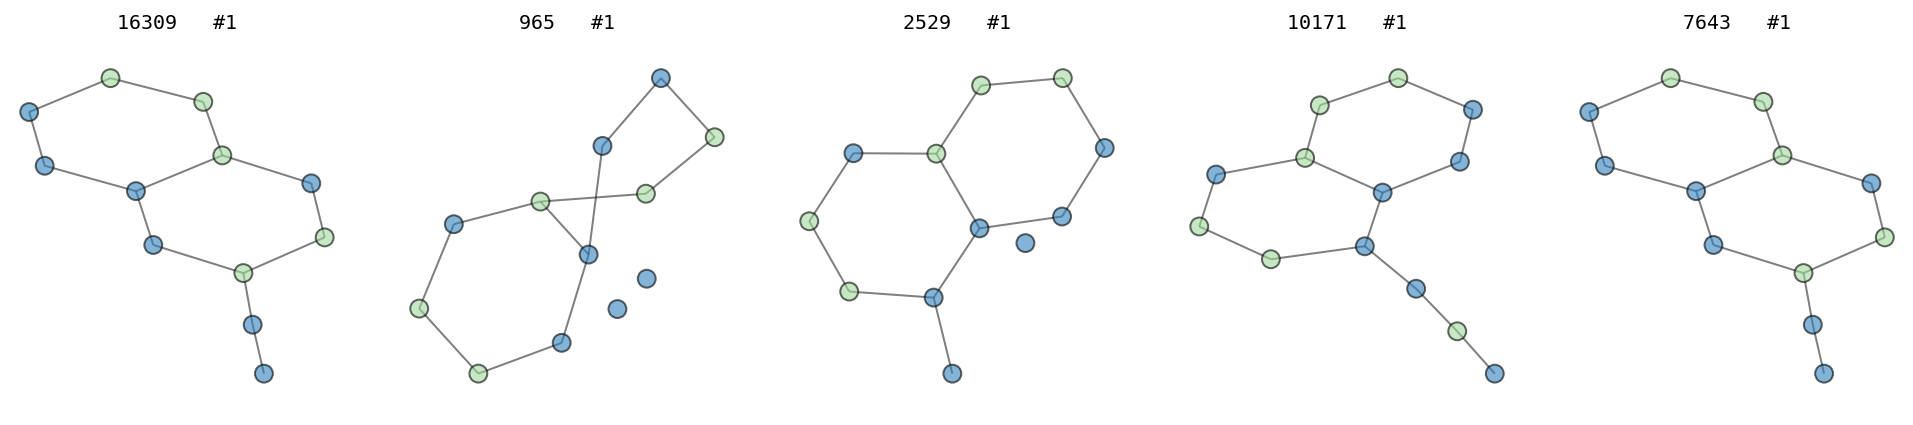

________________________________________________________________________________


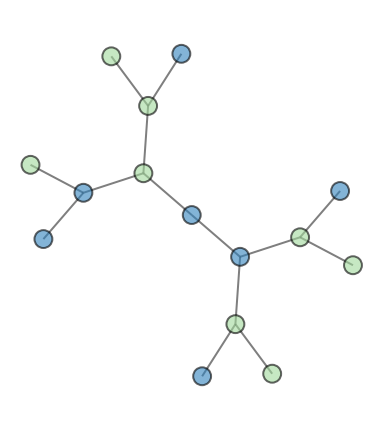

0 unique components in 0 fragments
No fragments


In [13]:
df = do_decompose(decompose_cycles, decompose_neighborhood, aggregate_function=decompose_pair_binary(distance=2), compose_function=decompose_edge_join)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


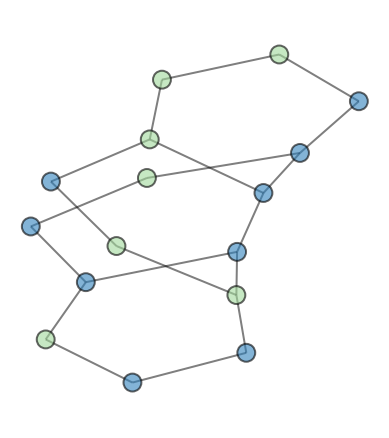

29 unique components in 31 fragments


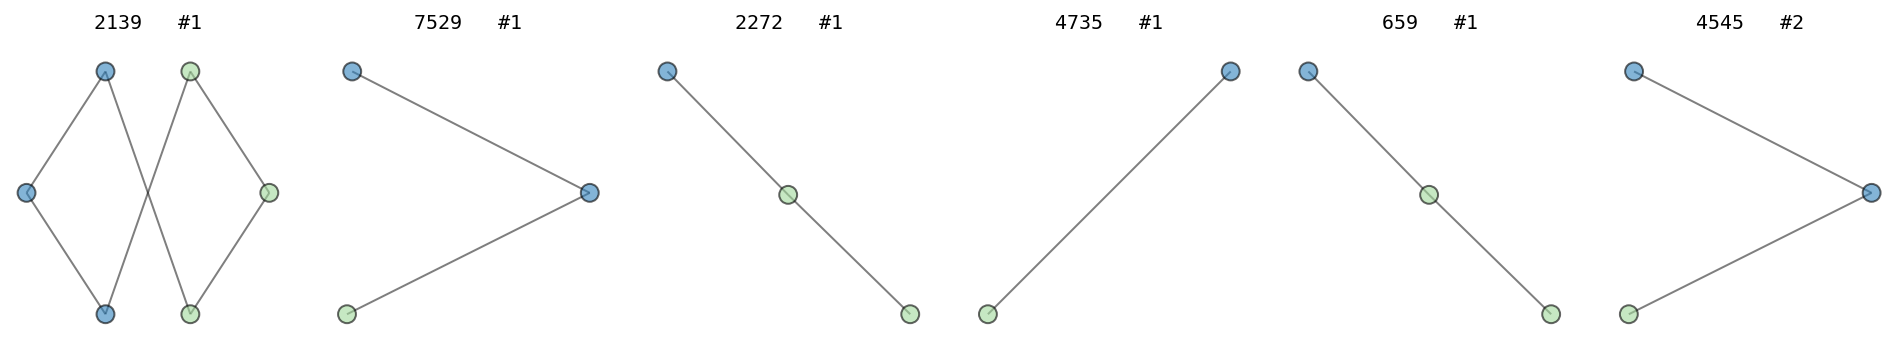

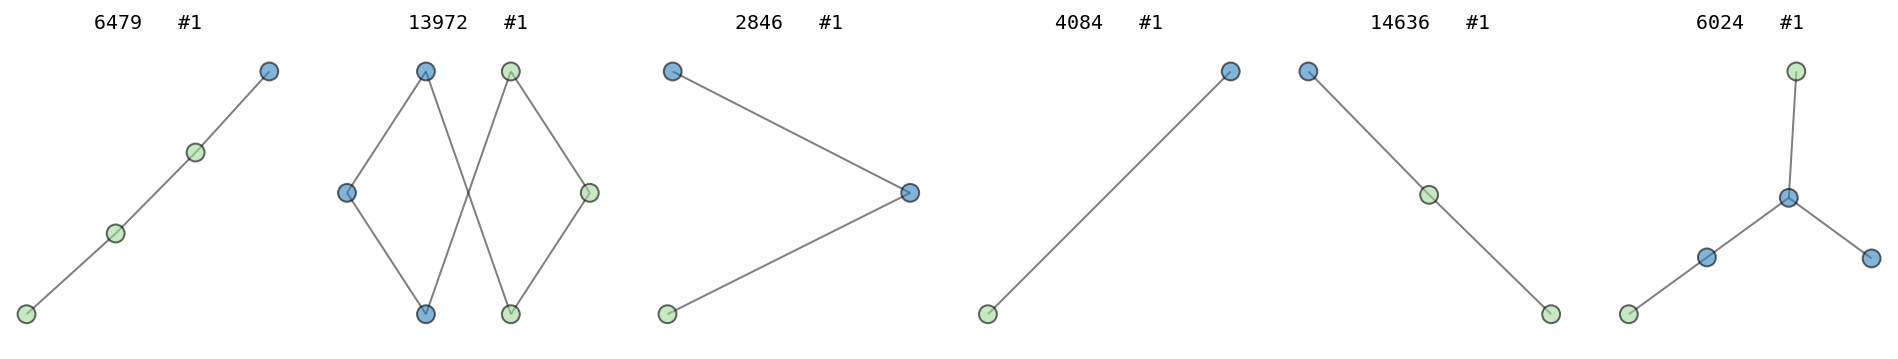

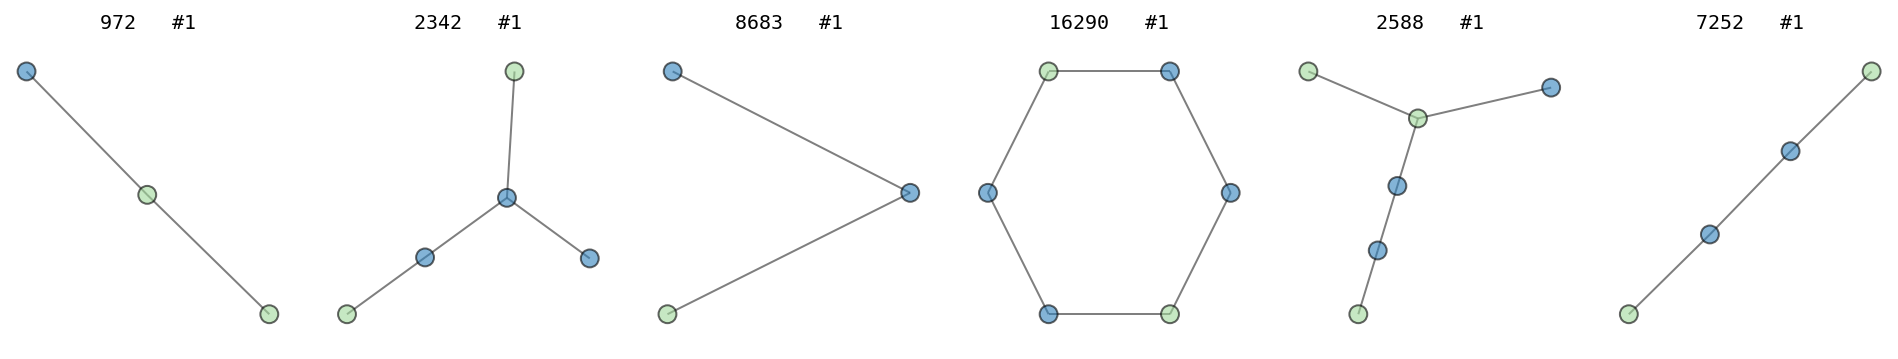

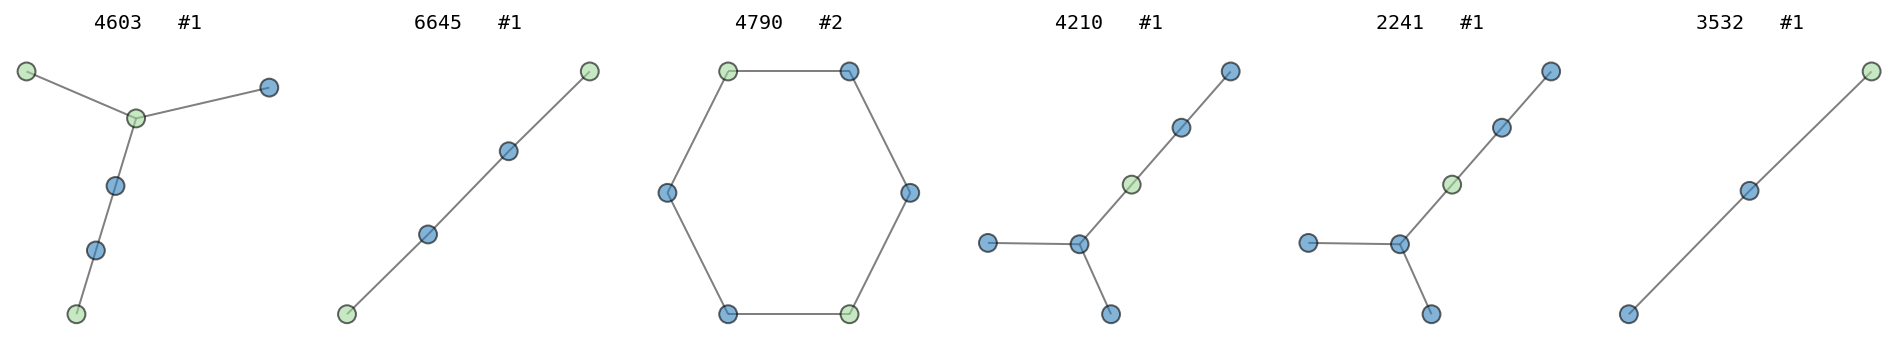

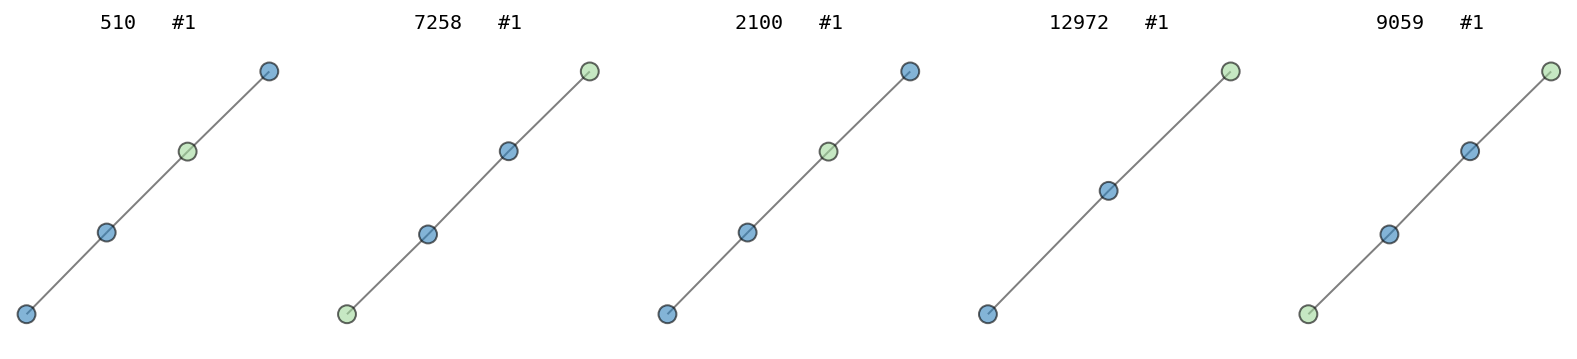

________________________________________________________________________________


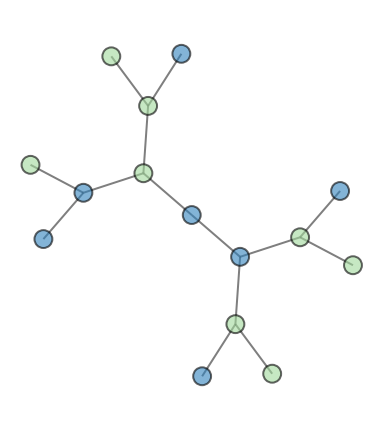

10 unique components in 10 fragments


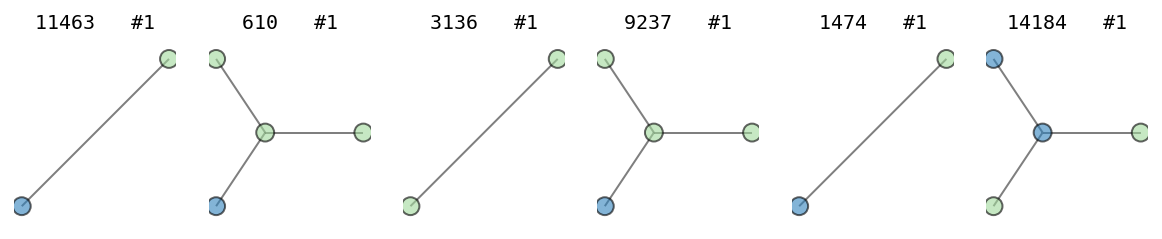

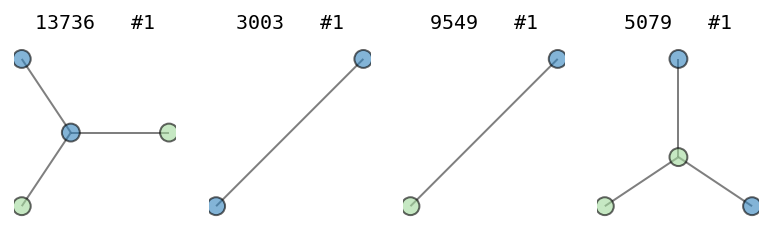

In [14]:
df = do_decompose(decompose_nodes, do_decompose(decompose_cycles, decompose_neighborhood), decompose_non_central(k_top=5), aggregate_function=decompose_relation_binary)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


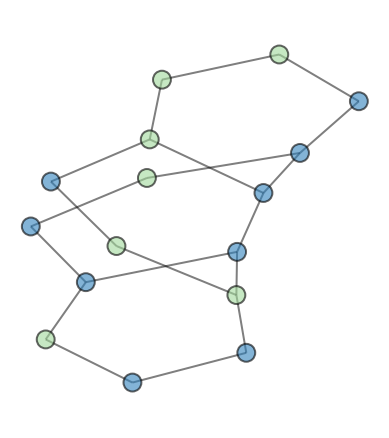

17 unique components in 79 fragments


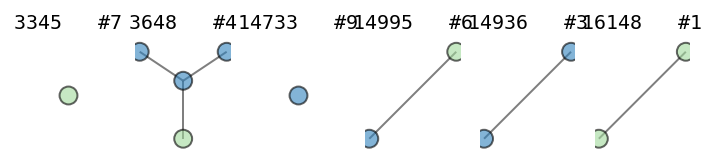

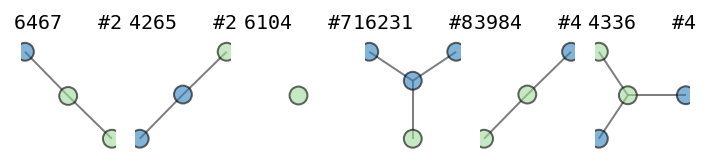

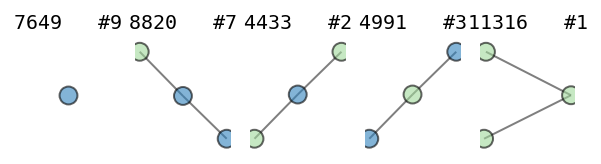

________________________________________________________________________________


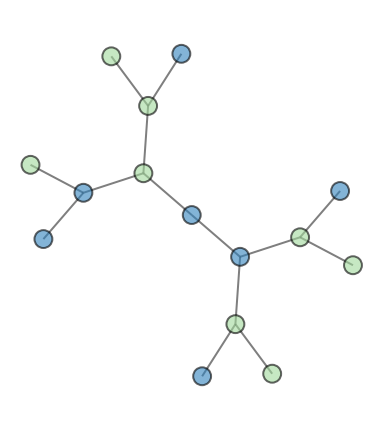

15 unique components in 51 fragments


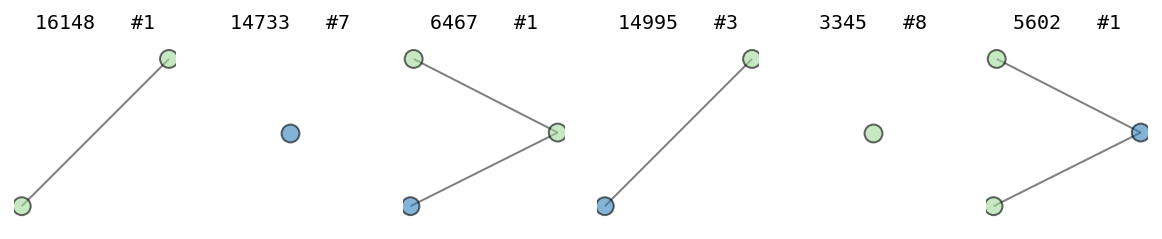

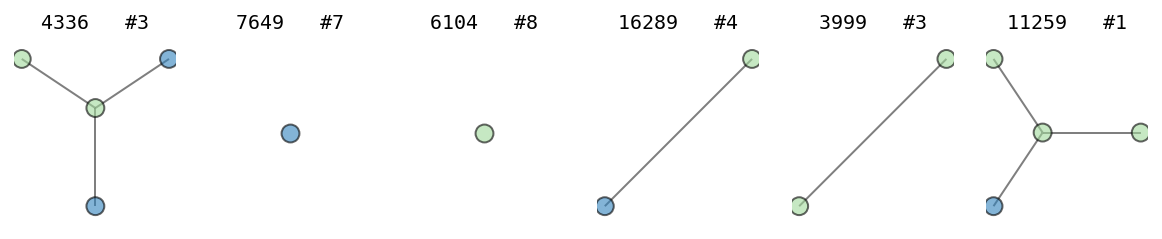

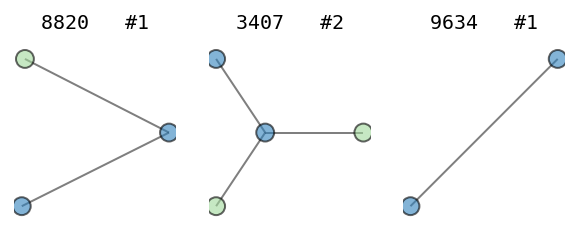

In [15]:
df1 = do_decompose(decompose_degree_and_non_degree(min_size=3), compose_function=decompose_neighborhood)
df2 = do_decompose(decompose_degree_and_non_degree(min_size=4), compose_function=decompose_neighborhood)
df = do_decompose(df1,df2)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


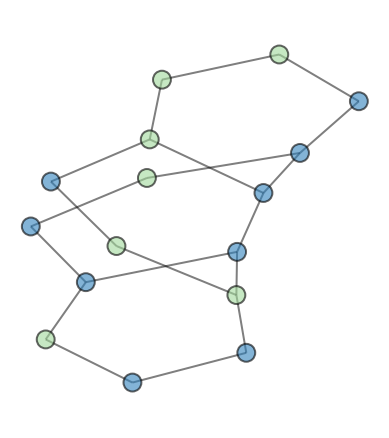

1 unique components in 1 fragments


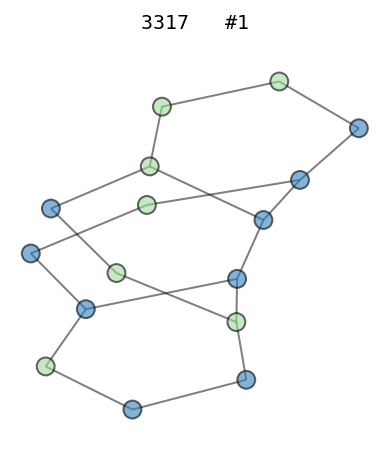

________________________________________________________________________________


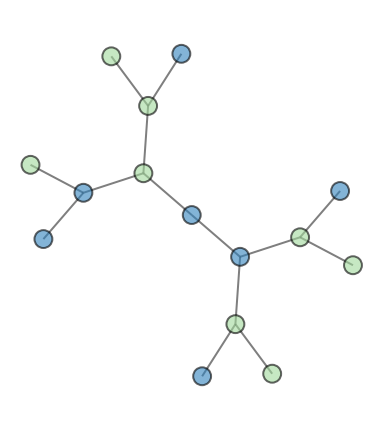

1 unique components in 1 fragments


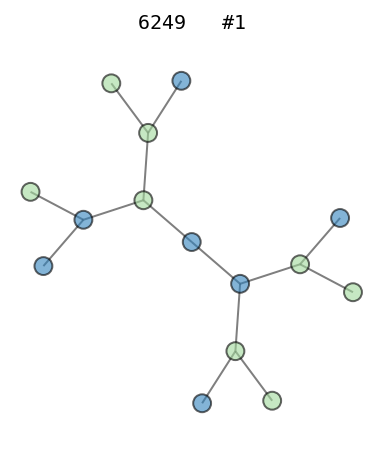

In [16]:
df0 = do_decompose(decompose_degree(min_size=4), decompose_neighborhood, aggregate_function=decompose_union, compose_function=decompose_all_union)
df1 = do_decompose(decompose_identity, df0, aggregate_function=decompose_difference)
df2 = do_decompose(df1, decompose_neighborhood, aggregate_function=decompose_union, compose_function=decompose_all_union)
df = do_decompose(df0, df2, compose_function=decompose_abstract_and_non_abstract)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


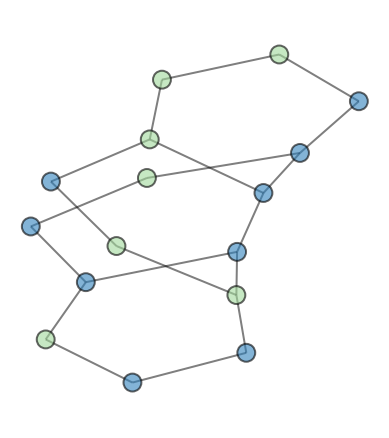

17 unique components in 98 fragments


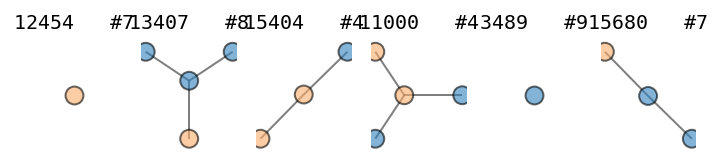

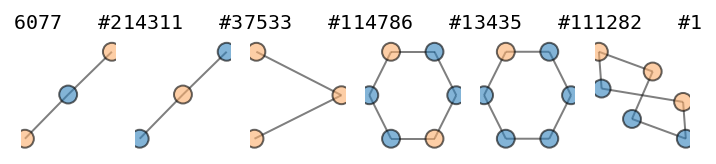

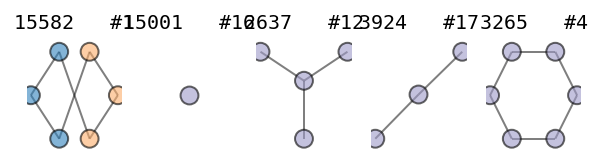

________________________________________________________________________________


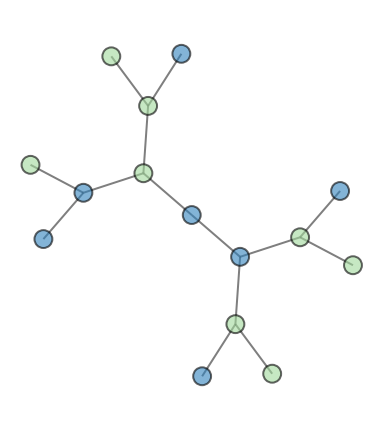

13 unique components in 60 fragments


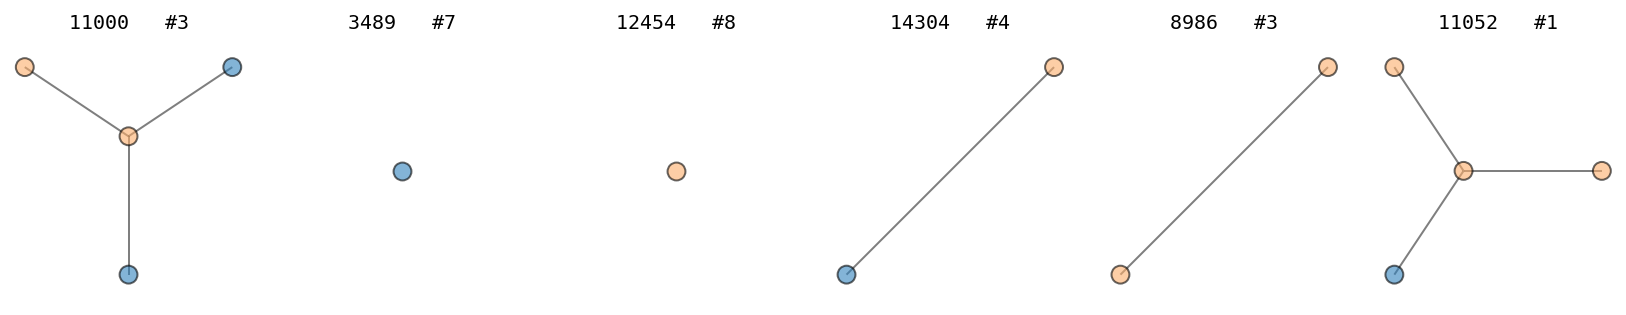

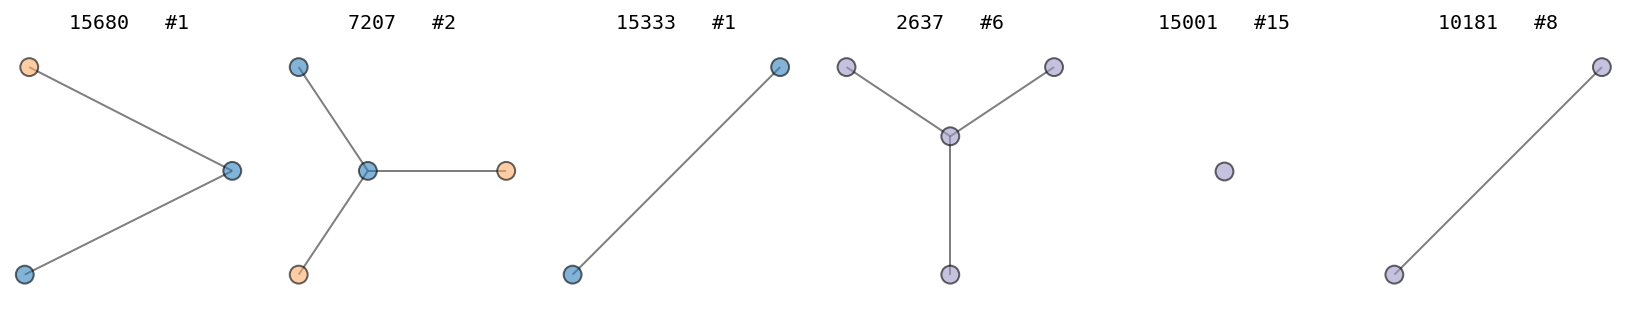

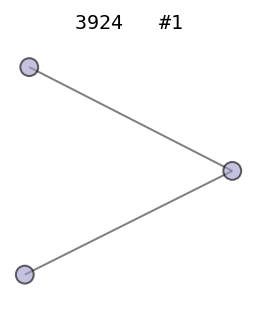

In [17]:
from ego.decomposition.node_relabel import decompose_node_relabel_null

df0 = do_decompose(decompose_neighborhood, decompose_cycles)
df1 = do_decompose(decompose_node_relabel_null, compose_function=df0)
df = [df0, df1]

draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


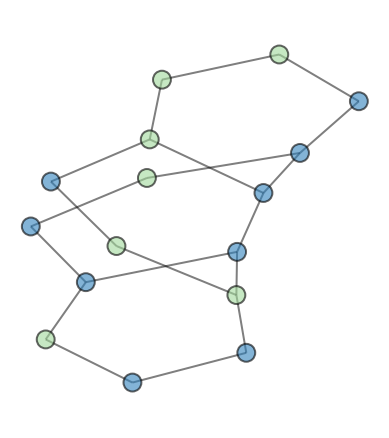

1 unique components in 1 fragments


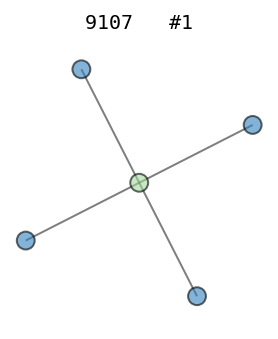

________________________________________________________________________________


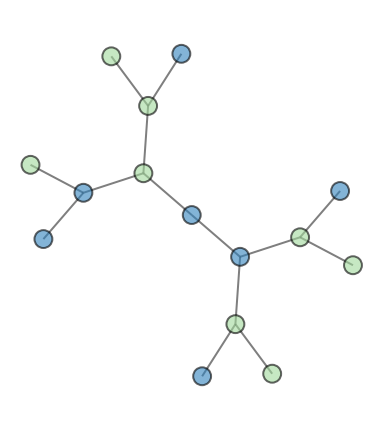

1 unique components in 1 fragments


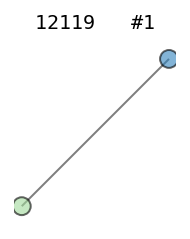

In [18]:
from ego.abstraction.abstract import decompose_abstract, decompose_abstract_and_non_abstract
df0 = do_decompose(decompose_degree(min_size=4)) 
df1 = do_decompose(decompose_degree(max_size=2))
df2 = do_decompose(decompose_degree(max_size=4, min_size=2))
df = do_decompose(df0, df1, df2, compose_function=decompose_abstract)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


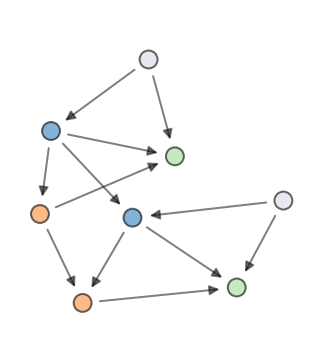

2 unique components in 2 fragments


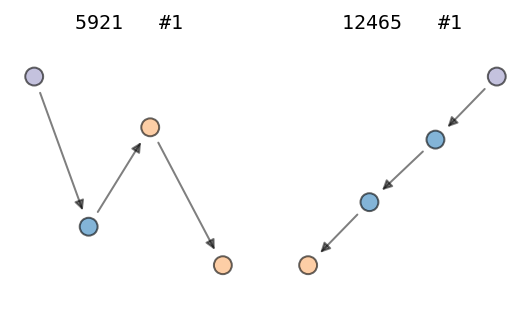

In [19]:
# directed graphs

g = nx.DiGraph()
g.add_node(0,label='A')
g.add_node(1,label='B')
g.add_node(2,label='C')
g.add_node(3,label='D')
g.add_node(10,label='A')
g.add_node(11,label='B')
g.add_node(12,label='C')
g.add_node(13,label='D')

g.add_edge(0,1, label='-')
g.add_edge(1,2, label='-')
g.add_edge(0,2, label='-')
g.add_edge(3,0, label='-')
g.add_edge(3,2, label='-')

g.add_edge(10,11, label='-')
g.add_edge(11,12, label='-')
g.add_edge(10,12, label='-')
g.add_edge(13,10, label='-')
g.add_edge(13,12, label='-')

g.add_edge(0,10, label='-')
g.add_edge(1,11, label='-')


df = do_decompose(decompose_neighborhood(max_radius=1))
df = do_decompose(decompose_path(length=3))
draw_decomposition_graphs([g], df, draw_graphs=draw_graphs)

---